<a href="https://colab.research.google.com/github/kerimux/FinTech_Project_2/blob/main/us_domestic_migration_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Imports
## Install and import the required libraries and dependencies
# Install the required libraries
!pip install pystan
!pip install prophet
!pip install hvplot
!pip install holoviews

import numpy as np
import seaborn as sns

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.3/45.3 MB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 9.5 MB/s eta 0:00:00


In [ ]:
# Import the required libraries and dependencies
import pandas as pd
import holoviews as hv
from prophet import Prophet
import hvplot.pandas
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Upload the file into Colab, then store in a Pandas DataFrame

from google.colab import files
uploaded = files.upload()

Saving state_to_state.csv to state_to_state.csv


In [ ]:
migration = pd.read_csv('state_to_state.csv', infer_datetime_format=True, parse_dates=True)


# Review the first and last five rows of the DataFrame
migration

IBRC_Geo_ID State                                  District Name  Year  \
0          6500001    AK  Kenai Peninsula Economic Development District  1990   
1          6500001    AK  Kenai Peninsula Economic Development District  1991   
2          6500001    AK  Kenai Peninsula Economic Development District  1992   
3          6500001    AK  Kenai Peninsula Economic Development District  1993   
4          6500001    AK  Kenai Peninsula Economic Development District  1994   
...            ...   ...                                            ...   ...   
12842      6500418    MT    Mission West Community Development Partners  2016   
12843      6500418    MT    Mission West Community Development Partners  2017   
12844      6500418    MT    Mission West Community Development Partners  2018   
12845      6500418    MT    Mission West Community Development Partners  2019   
12846      6500418    MT    Mission West Community Development Partners  2020   

       Births  Deaths  Net International Migration  Net Domestic Migration  \
0         195      55                          3.0                     155   
1         766     146                         18.0                     800   
2         736     151                         43.0                     129   
3         703     194                         42.0                      70   
4         693     192                         26.0                     778   
...       ...     ...                          ...                     ...   
12842     493     520                          9.0                     367   
12843     528     535                         29.0                     872   
12844     462     512                         11.0                     227   
12845     428     489                         27.0                     589   
12846     440     576                         19.0                     857   

       Residual  
0             0  
1            -9  
2           -15  
3           -12  
4           -24  
...         ...  
12842         0  
12843         2  
12844        -3  
12845        -5  
12846        -7  

[12847 rows x 9 columns]

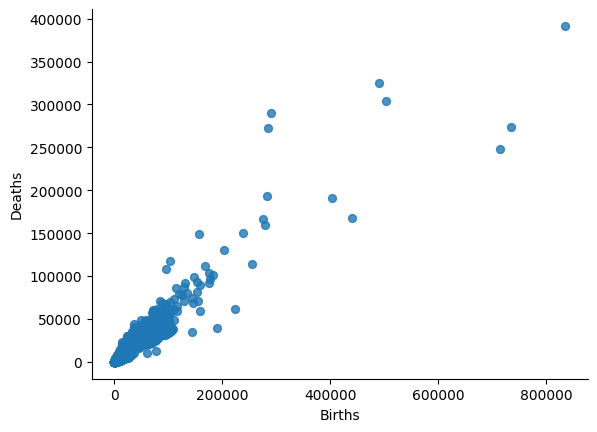

In [ ]:
# @title Births vs Deaths

from matplotlib import pyplot as plt
migration.plot(kind='scatter', x='Births', y='Deaths', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Grouping by the 'State' column
grouped_by_state = migration.groupby('State')

# Now, you can perform operations on each group, for example, calculating the mean
by_state = grouped_by_state.sum()

slice_year = migration[(migration['Year'] >= 1990) & (migration['Year'] <= 2020)]

grouped_df = slice_year.groupby(['State', 'Year']).sum()
grouped_df = grouped_df.reset_index()
ca_df = grouped_df[grouped_df['State'] == 'CA'][['Year', 'Net Domestic Migration']]
tx_df = grouped_df[grouped_df['State'] == 'TX'][['Year', 'Net Domestic Migration']]
fl_df = grouped_df[grouped_df['State'] == 'FL'][['Year', 'Net Domestic Migration']]
co_df = grouped_df[grouped_df['State'] == 'CO'][['Year', 'Net Domestic Migration']]
ny_df = grouped_df[grouped_df['State'] == 'NY'][['Year', 'Net Domestic Migration']]


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp18ru6icx/3k3hmptl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp18ru6icx/pg6p4475.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8618', 'data', 'file=/tmp/tmp18ru6icx/3k3hmptl.json', 'init=/tmp/tmp18ru6icx/pg6p4475.json', 'output', 'file=/tmp/tmp18ru6icx/prophet_model1alh5gkw/prophet_model-20240224022024.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:20:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:20:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:c

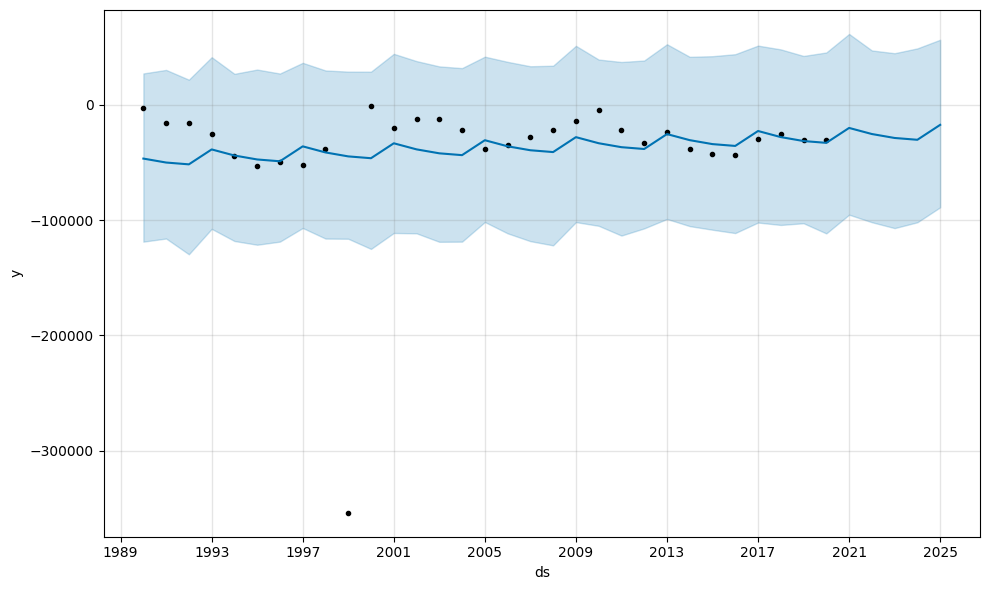

In [ ]:
ny_df['ds'] = pd.to_datetime(ny_df['Year'], format='%Y')
ny_df = ny_df[['ds', 'Net Domestic Migration']]
ny_df.rename(columns={'Net Domestic Migration': 'y'}, inplace=True)
# Create the model
ny_model = Prophet()

# Fit the model
ny_model.fit(ny_df)

ny_future = ny_model.make_future_dataframe(periods=5, freq='YS')
# Make predictions
ny_forecast = ny_model.predict(ny_future)

ny_model.plot(ny_forecast);

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp18ru6icx/rb3w_ggm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp18ru6icx/f8ukd8lo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16176', 'data', 'file=/tmp/tmp18ru6icx/rb3w_ggm.json', 'init=/tmp/tmp18ru6icx/f8ukd8lo.json', 'output', 'file=/tmp/tmp18ru6icx/prophet_model6idss0td/prophet_model-20240224022025.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:20:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:20:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:

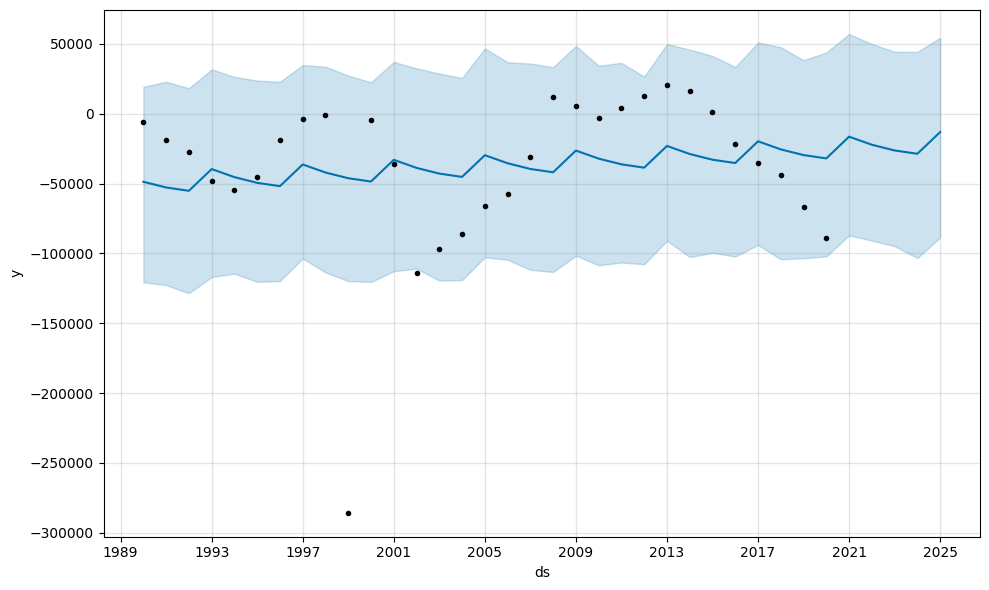

In [ ]:
ca_df['ds'] = pd.to_datetime(ca_df['Year'], format='%Y')
ca_df = ca_df[['ds', 'Net Domestic Migration']]

# Rename the 'Net Domestic Migration' column to 'y'
ca_df.rename(columns={'Net Domestic Migration': 'y'}, inplace=True)
# Create the model
ca_model = Prophet()

# Fit the model
ca_model.fit(ca_df)

ca_future = ca_model.make_future_dataframe(periods=5, freq='YS')
# Make predictions
ca_forecast = ca_model.predict(ca_future)

ca_model.plot(ca_forecast);

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp18ru6icx/gn8yquhj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp18ru6icx/qjyckc81.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66968', 'data', 'file=/tmp/tmp18ru6icx/gn8yquhj.json', 'init=/tmp/tmp18ru6icx/qjyckc81.json', 'output', 'file=/tmp/tmp18ru6icx/prophet_modelzap2bhni/prophet_model-20240224022027.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:20:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:20:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:

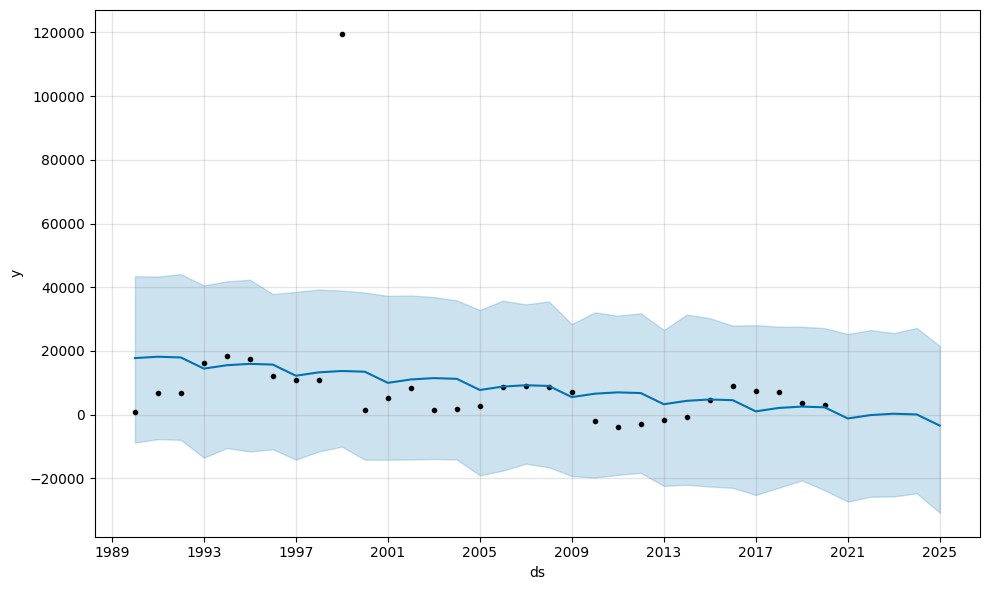

In [ ]:
co_df['ds'] = pd.to_datetime(co_df['Year'], format='%Y')
co_df = co_df[['ds', 'Net Domestic Migration']]

# Rename the 'Net Domestic Migration' column to 'y'
co_df.rename(columns={'Net Domestic Migration': 'y'}, inplace=True)
# Create the model
co_model = Prophet()

# Fit the model
co_model.fit(co_df)

co_future = co_model.make_future_dataframe(periods=5, freq='YS')
# Make predictions
co_forecast = co_model.predict(co_future)

co_model.plot(co_forecast);

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp18ru6icx/rqhrle_6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp18ru6icx/wmud5lpu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85453', 'data', 'file=/tmp/tmp18ru6icx/rqhrle_6.json', 'init=/tmp/tmp18ru6icx/wmud5lpu.json', 'output', 'file=/tmp/tmp18ru6icx/prophet_model9dtl7flq/prophet_model-20240224022028.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:20:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:20:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:

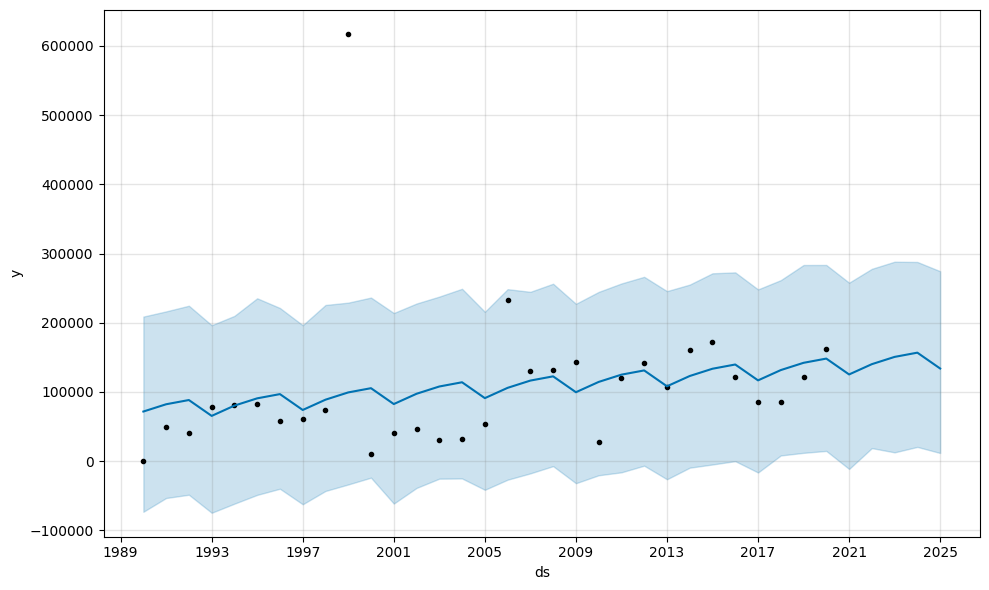

In [ ]:
tx_df['ds'] = pd.to_datetime(tx_df['Year'], format='%Y')
tx_df = tx_df[['ds', 'Net Domestic Migration']]

# Rename the 'Net Domestic Migration' column to 'y'
tx_df.rename(columns={'Net Domestic Migration': 'y'}, inplace=True)
# Create the model
tx_model = Prophet()

# Fit the model
tx_model.fit(tx_df)

tx_future = tx_model.make_future_dataframe(periods=5, freq='YS')
# Make predictions
tx_forecast = tx_model.predict(tx_future)

tx_model.plot(tx_forecast);

In [ ]:
grouped_by_state = migration.groupby('State')

grouped_df = grouped_by_state.sum()

# Slice the DataFrame based on the specified year range
slice_year = migration[(migration['Year'] >= 2000) & (migration['Year'] <= 2020)]

# Group DataFrame by 'State' and 'Year' and summing the values
grouped_df = slice_year.groupby(['State', 'Year']).sum()

# Reset the index
grouped_df = grouped_df.reset_index()

# Creating individual DataFrames for each state based
state_dfs = {}
for state in grouped_df['State'].unique():
    state_df = grouped_df[grouped_df['State'] == state][['Year', 'Net Domestic Migration']]
    state_dfs[state] = state_df

for state, state_df in state_dfs.items():
    locals()[f"{state}_df"] = state_df

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 15.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp18ru6icx/xrlzwgxj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp18ru6icx/ocnp_5v3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26682', 'data', 'file=/tmp/tmp18ru6icx/xrlzwgxj.json', 'init=/tmp/tmp18ru6icx/ocnp_5v3.json', 'output', 'file=/tmp/tmp18ru6icx/prophet_model_5znabmw/prophet_model-20240224022031.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:20:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:20:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:

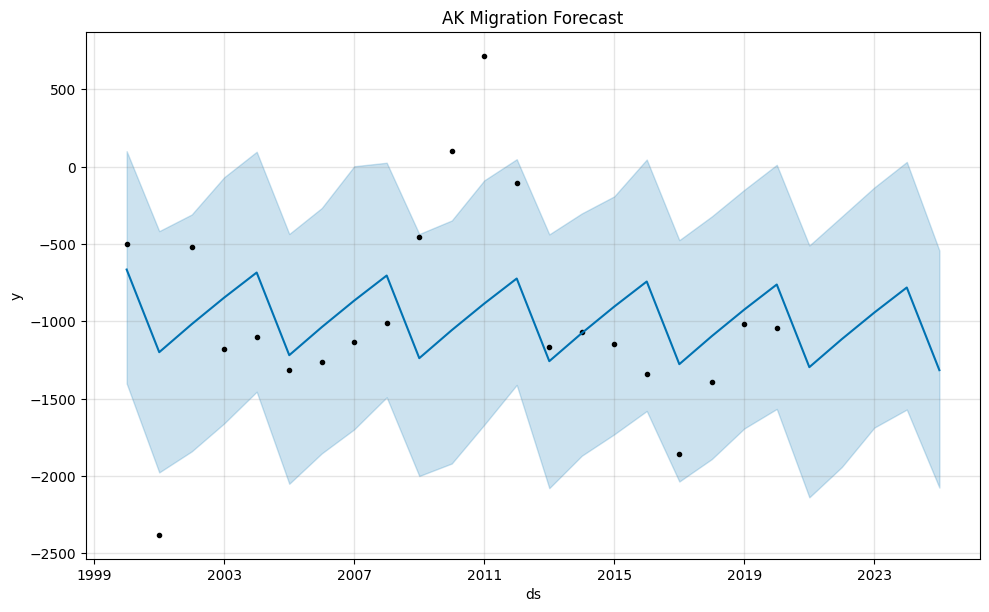

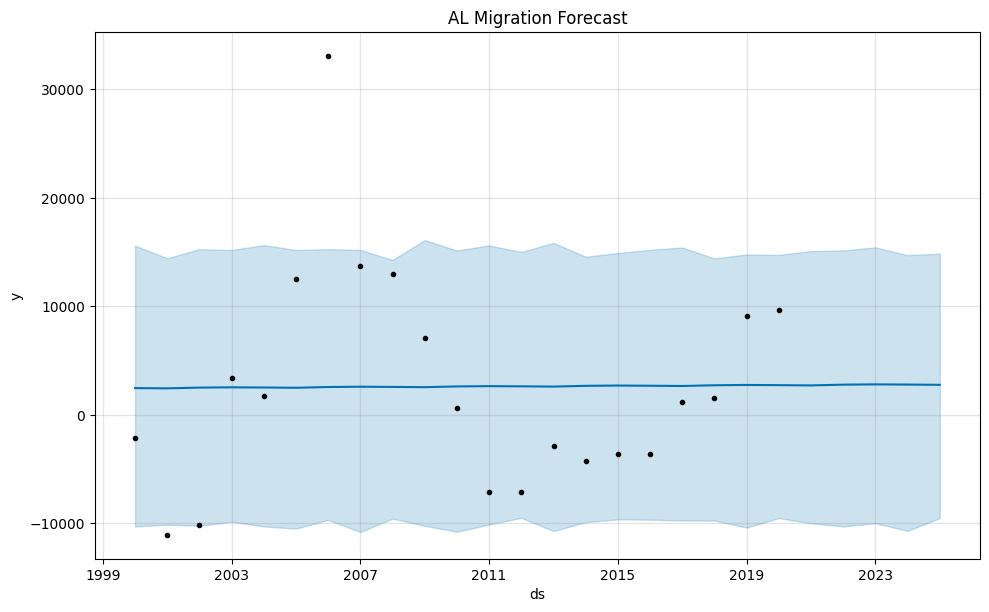

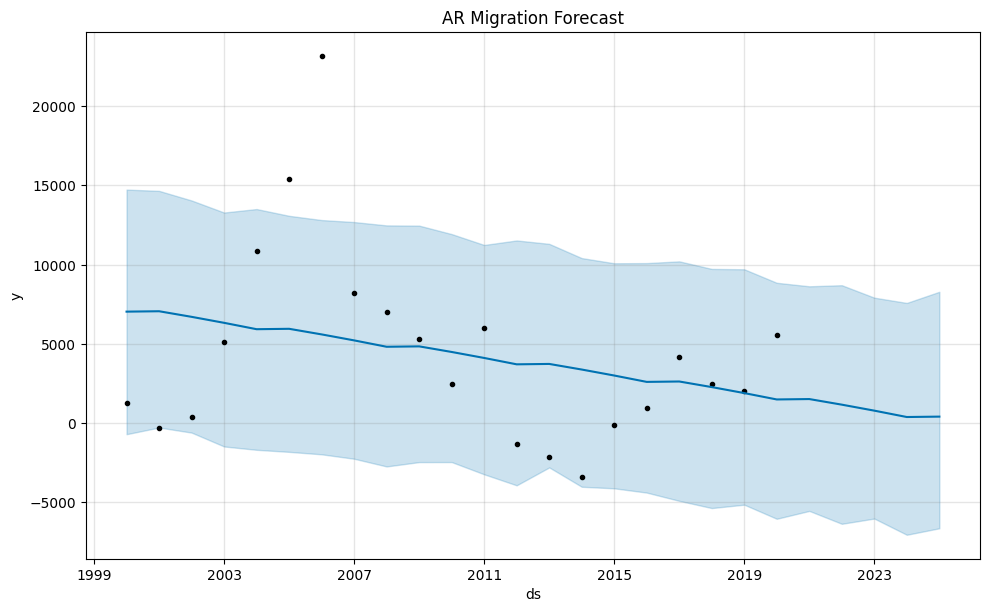

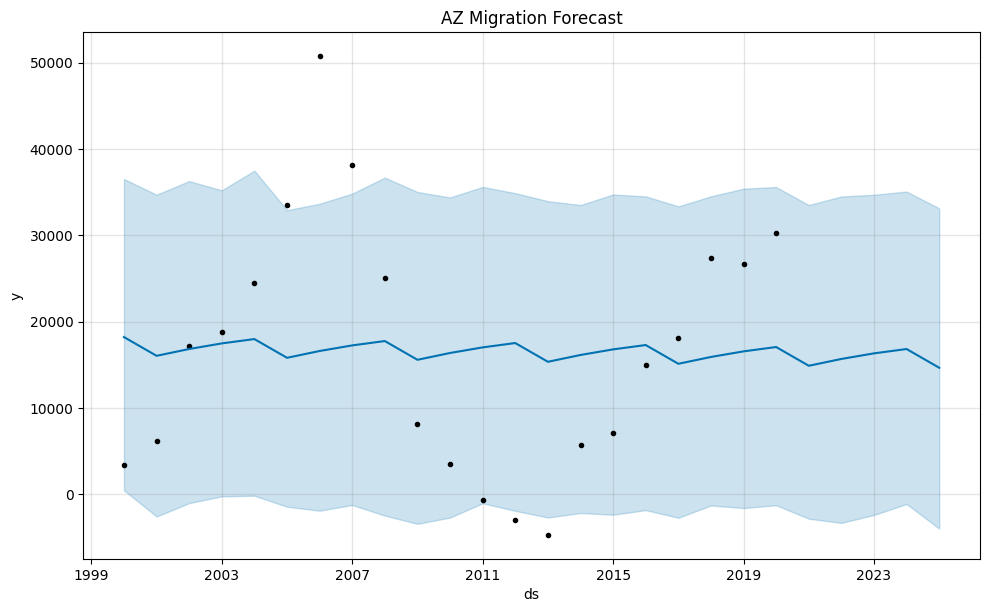

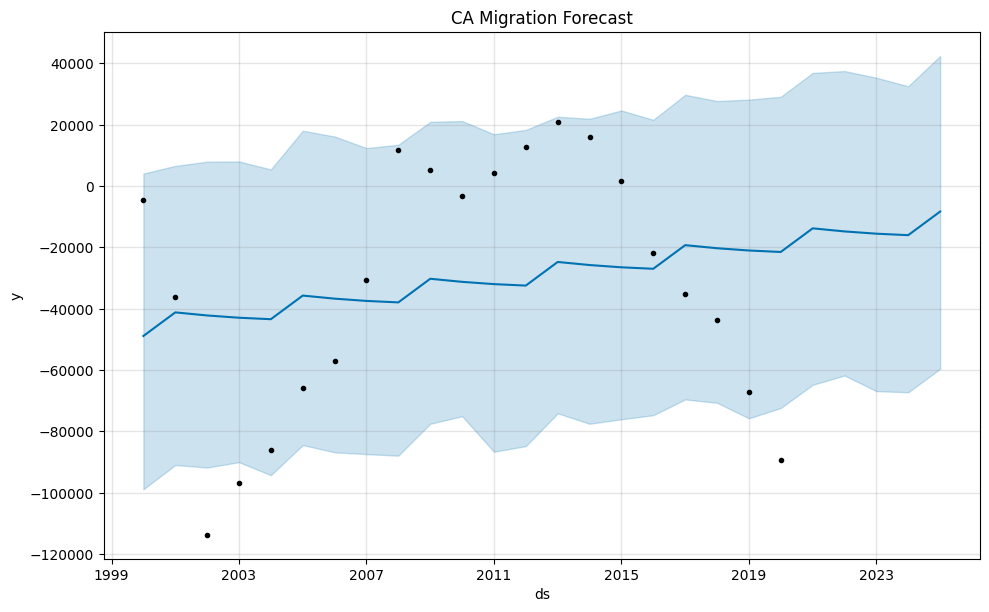

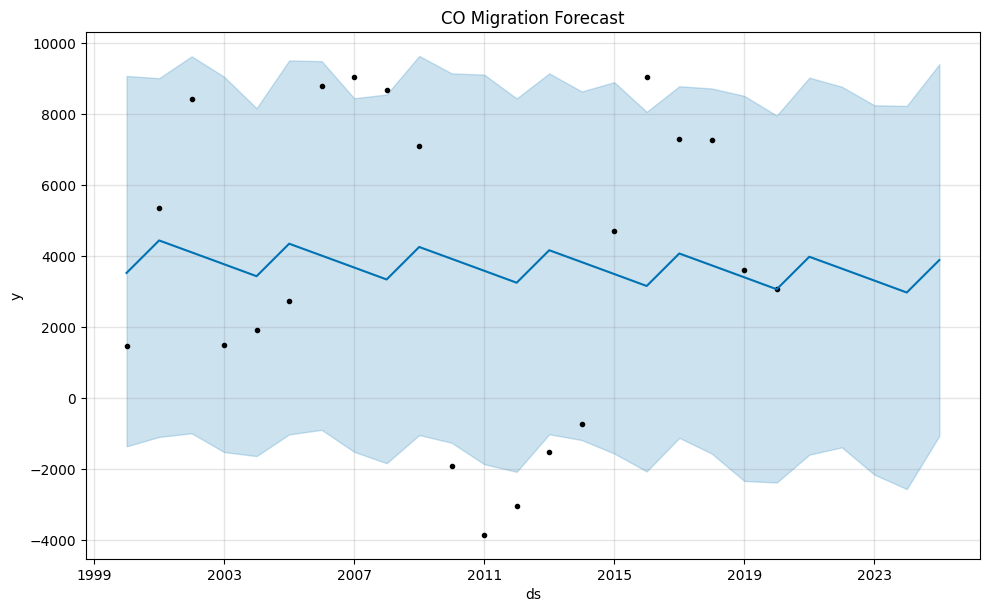

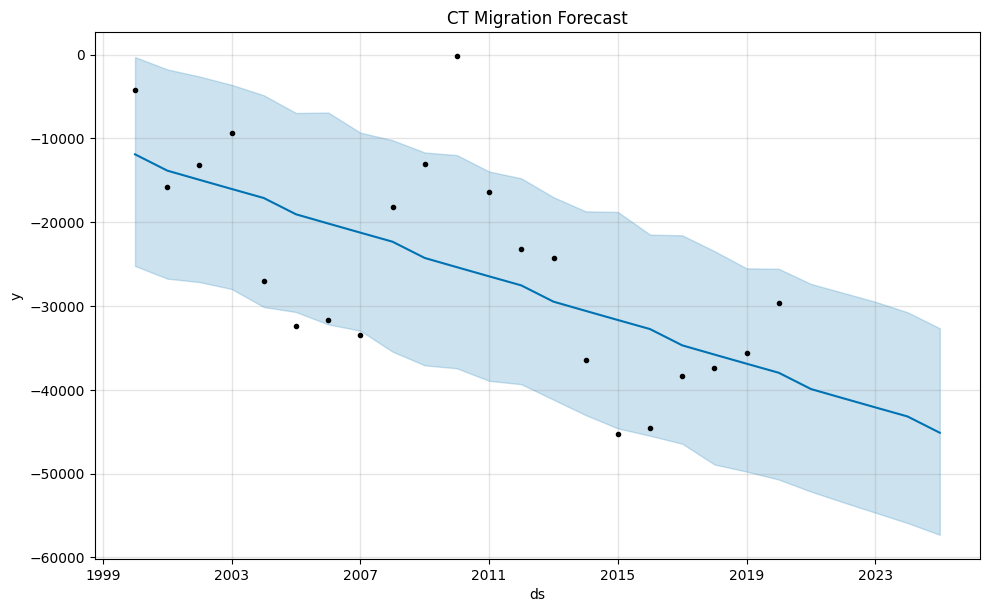

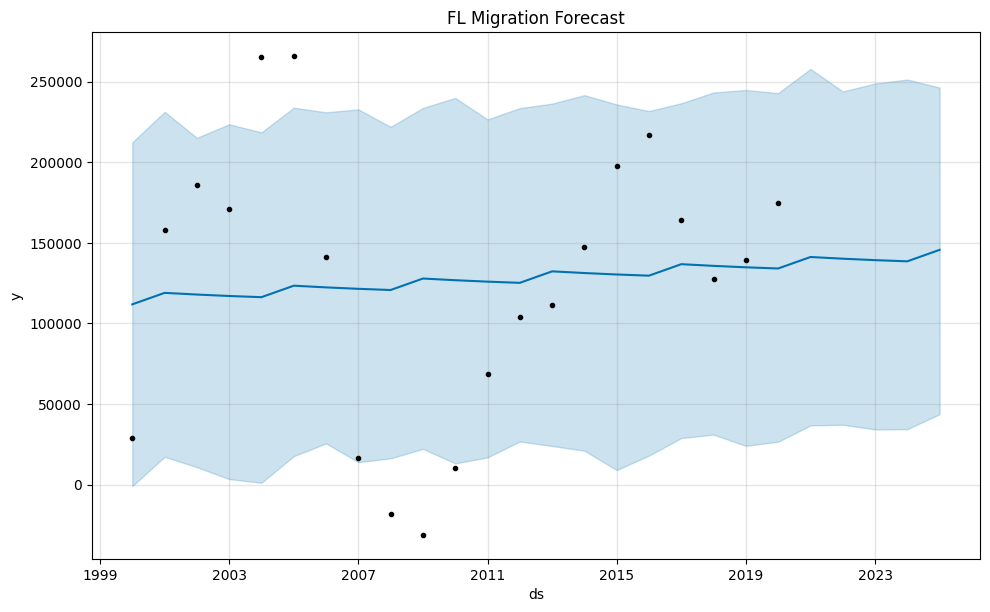

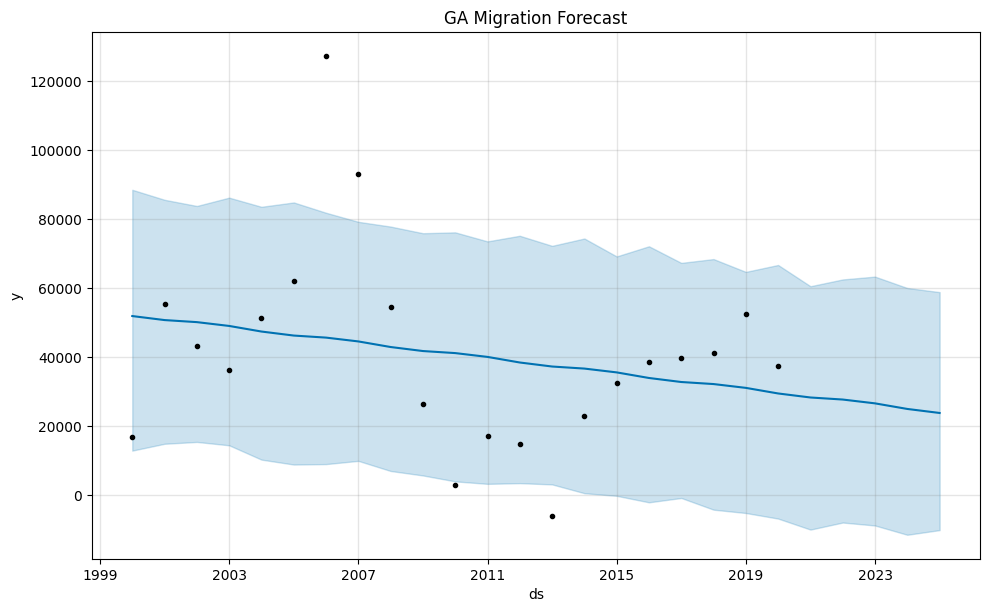

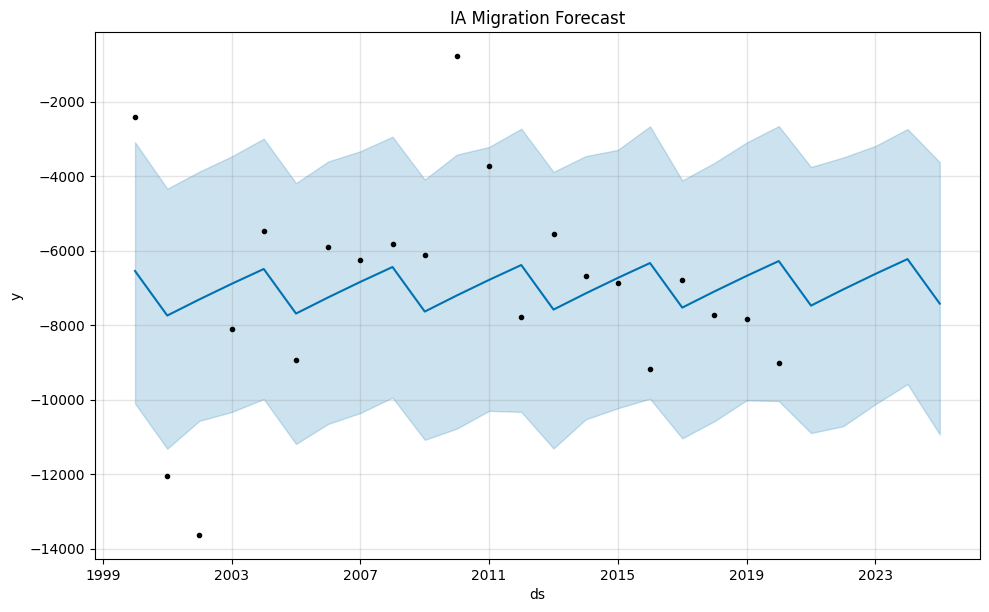

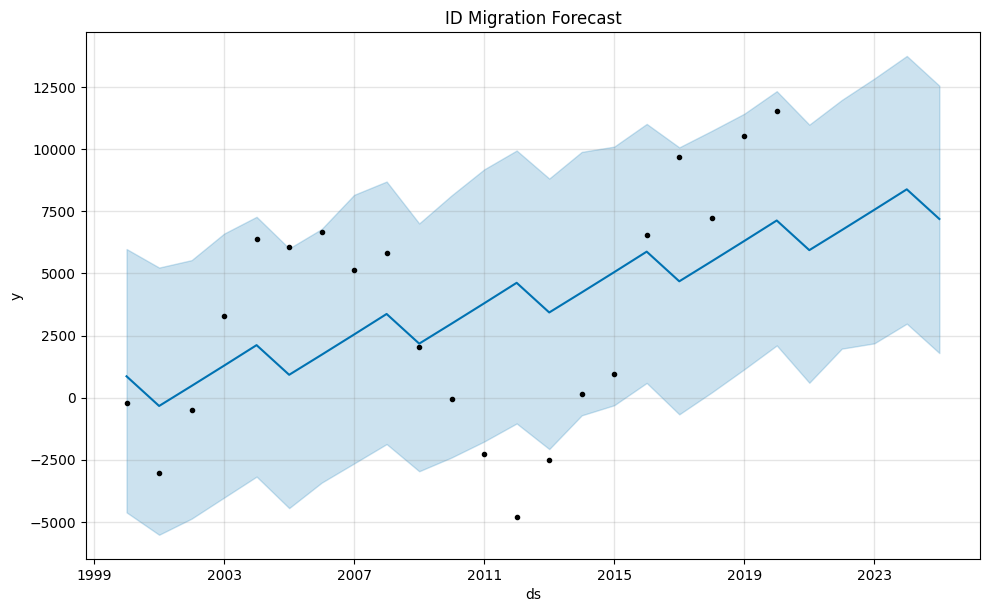

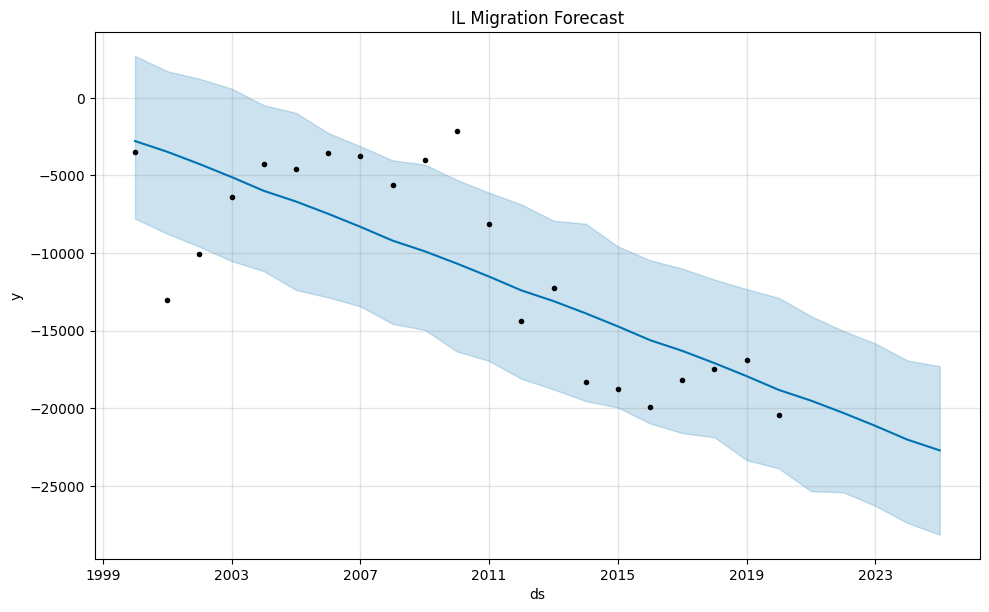

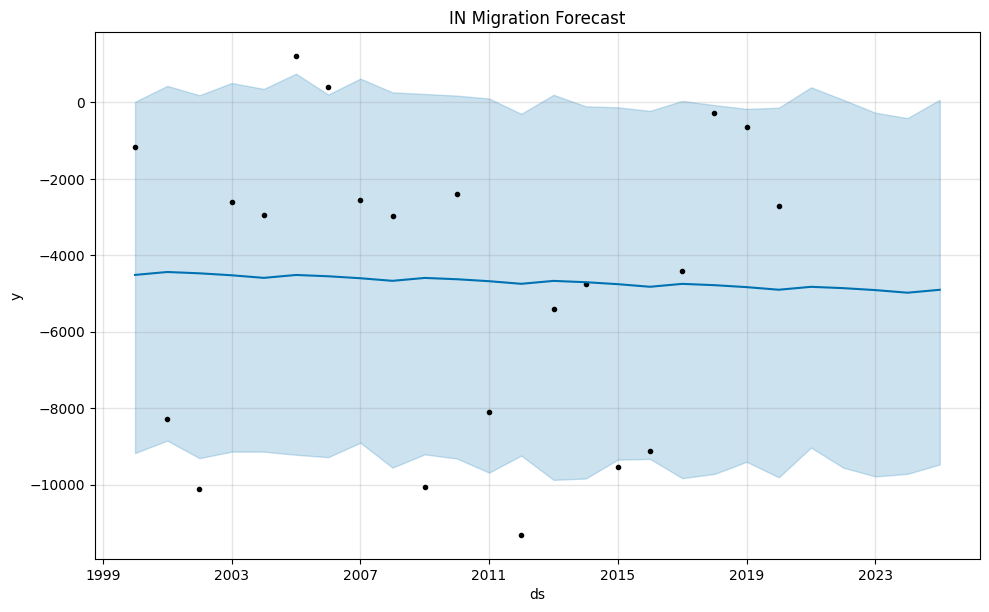

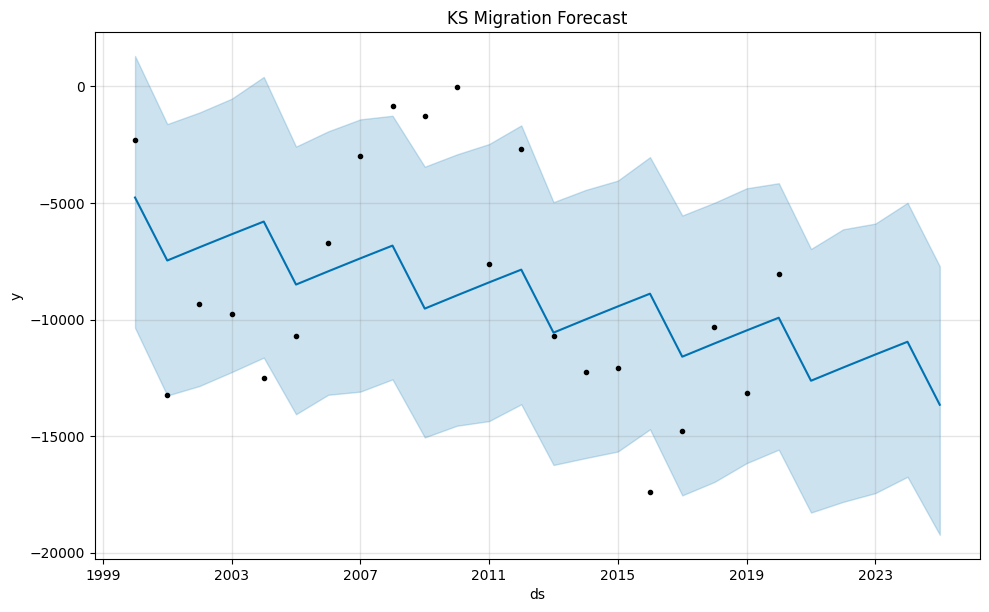

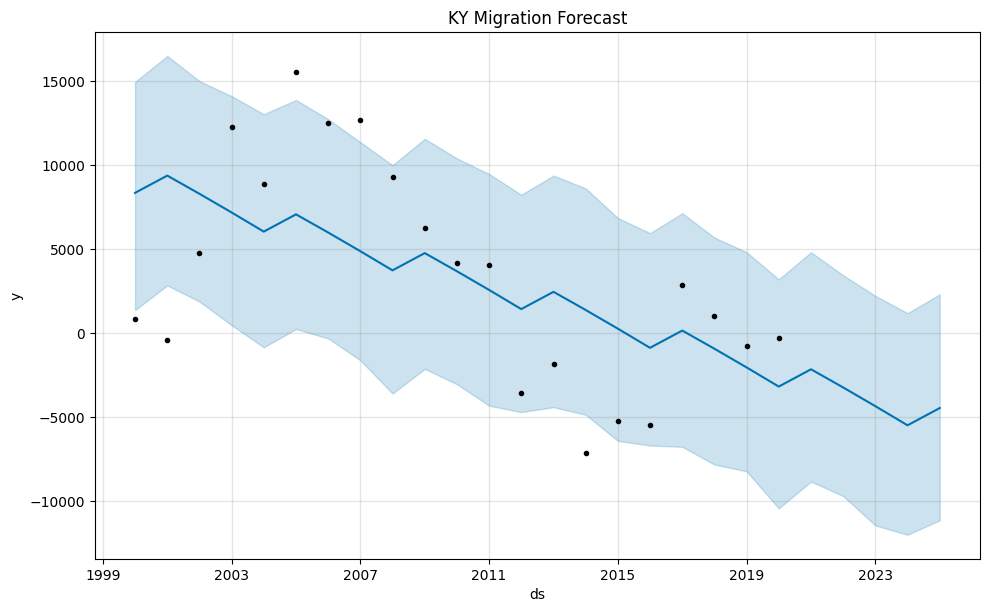

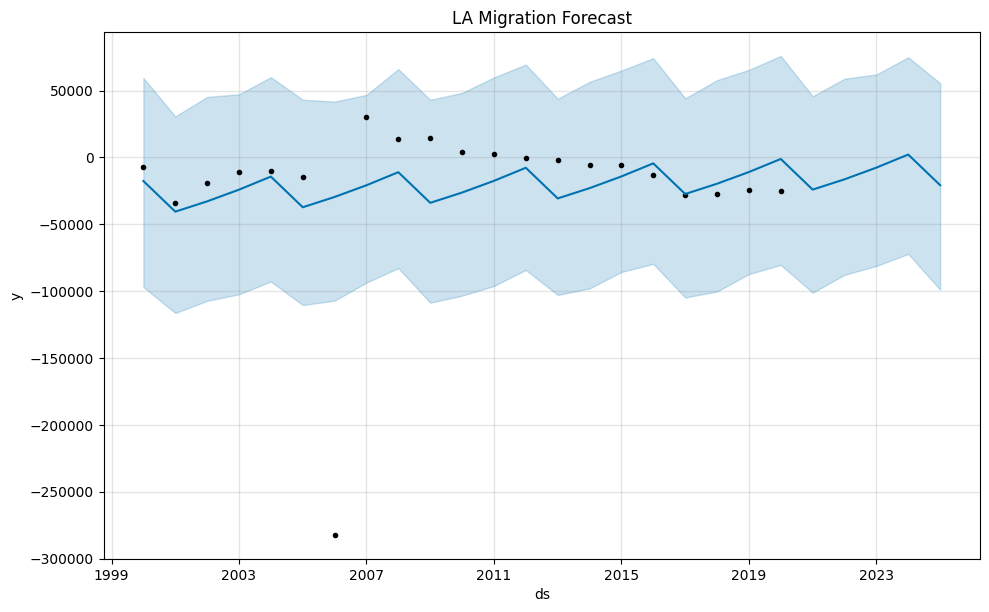

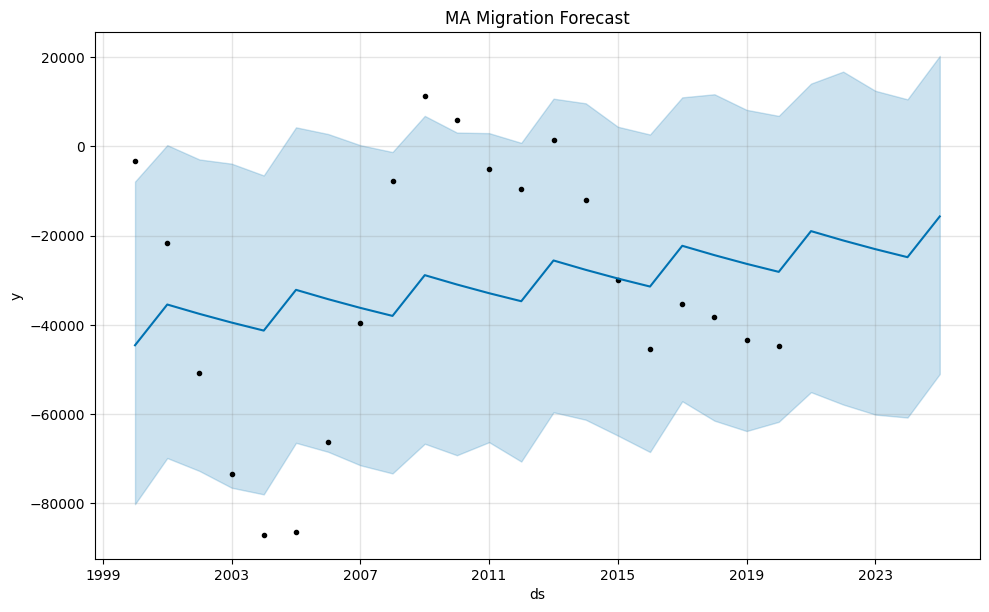

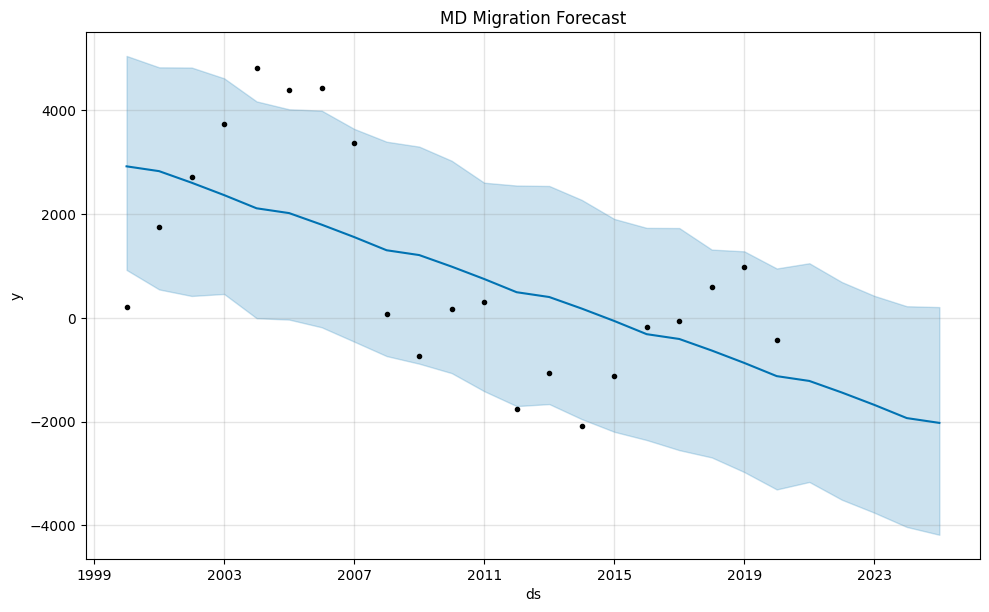

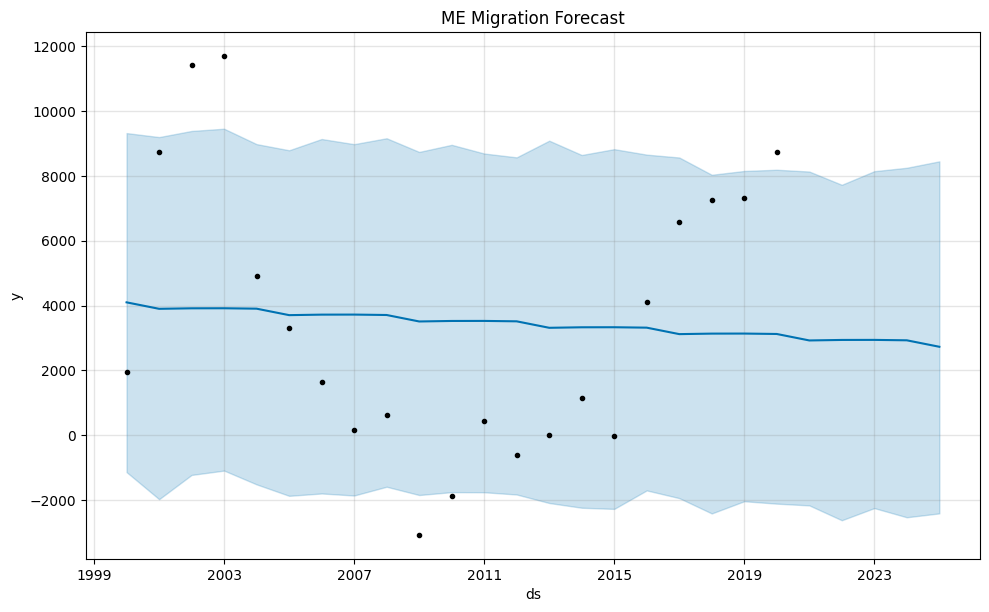

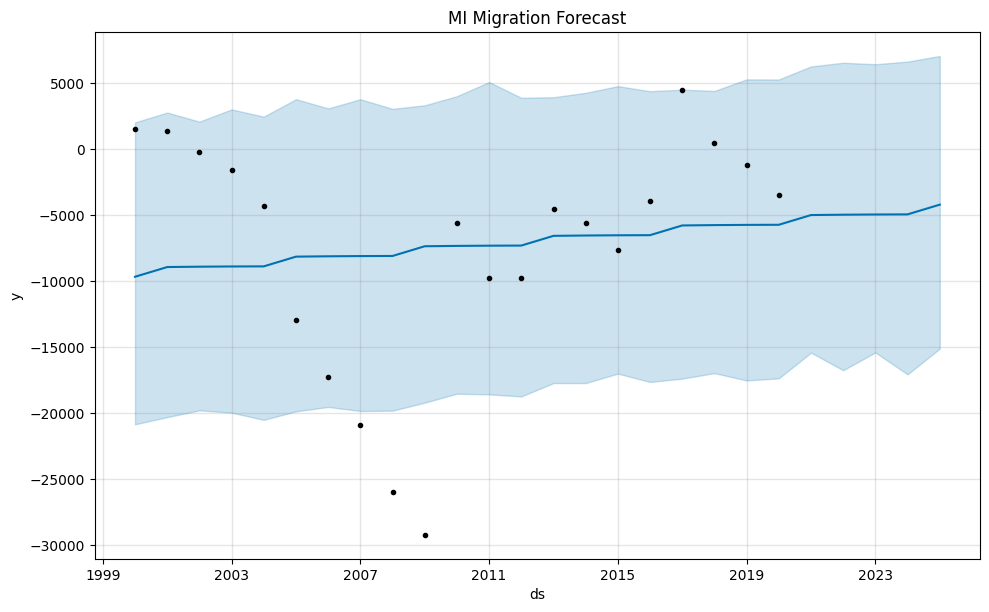

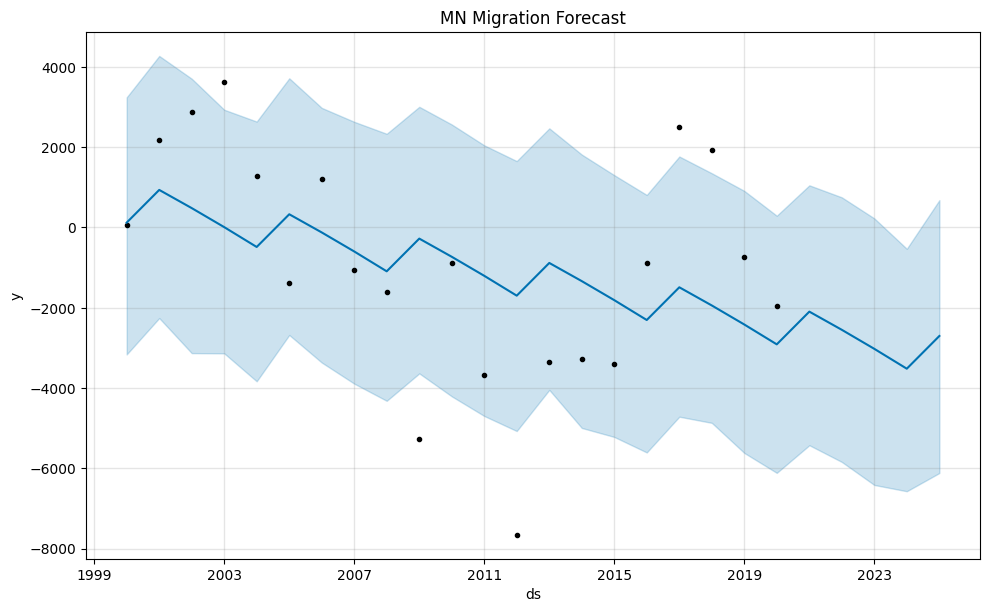

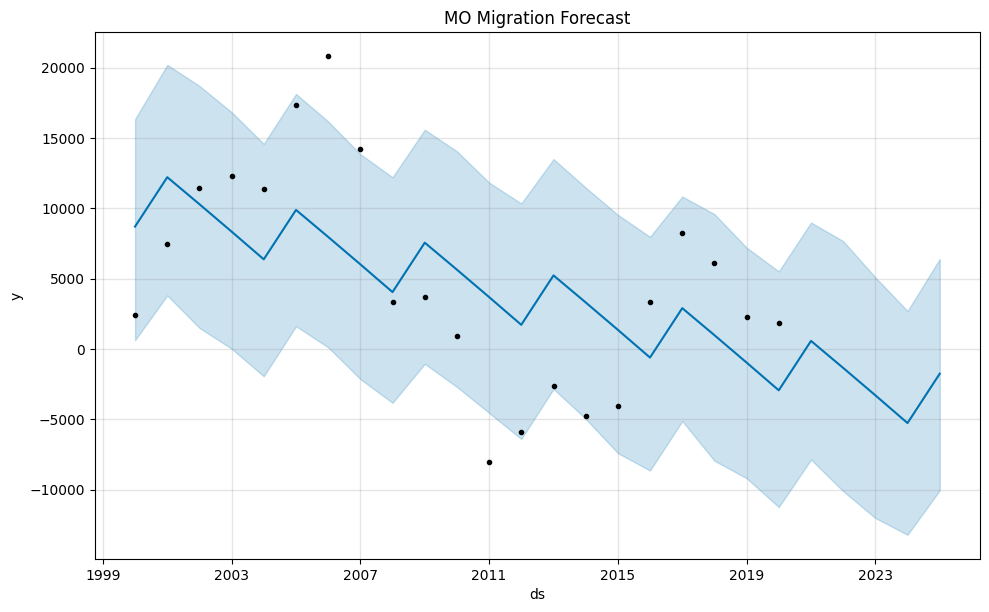

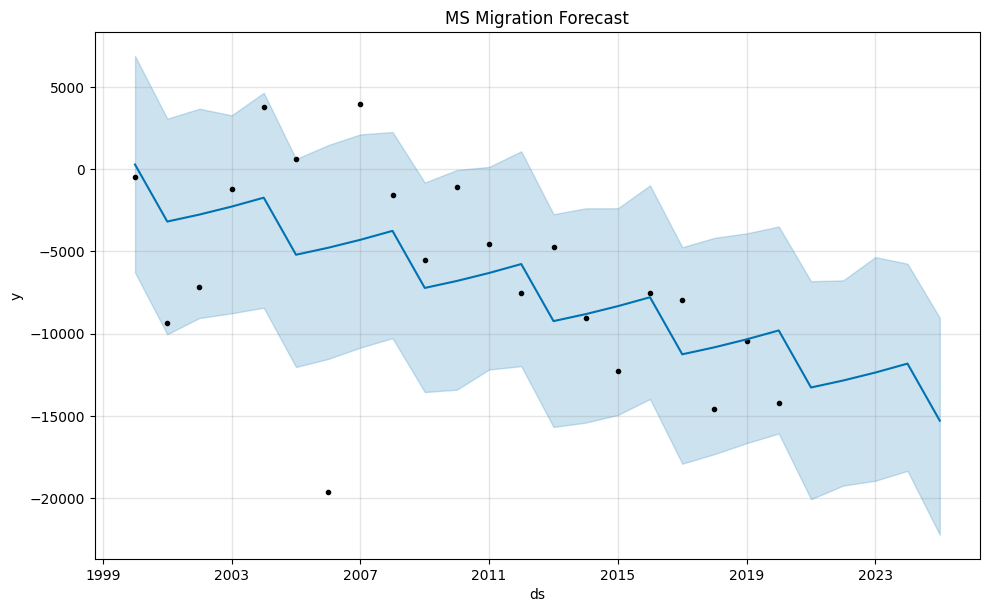

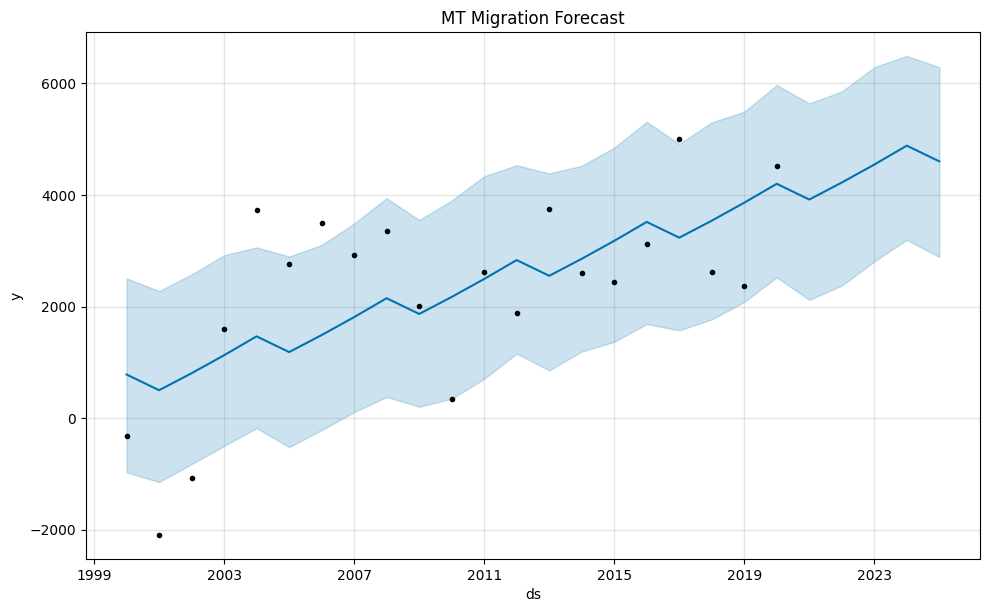

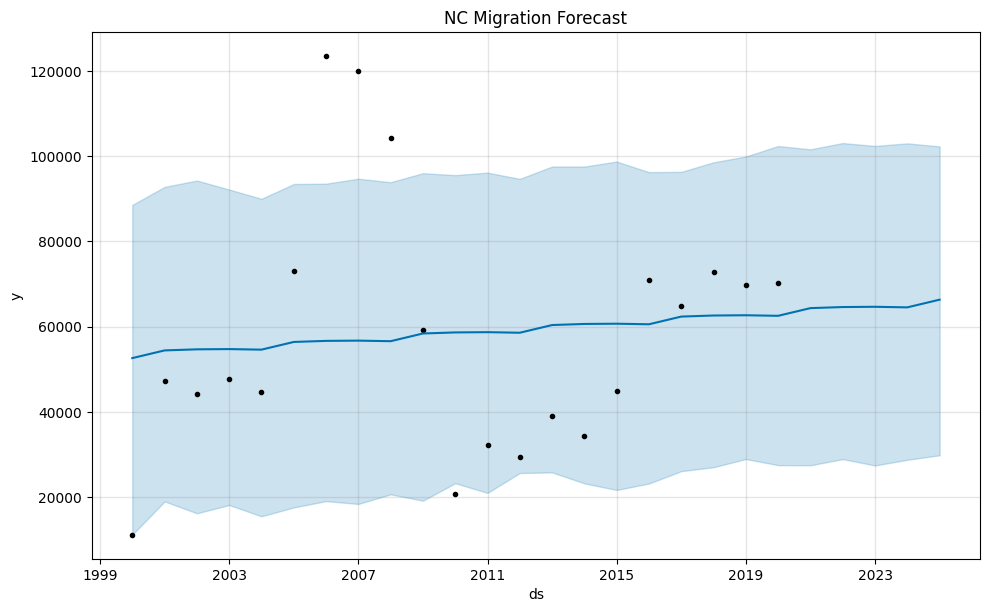

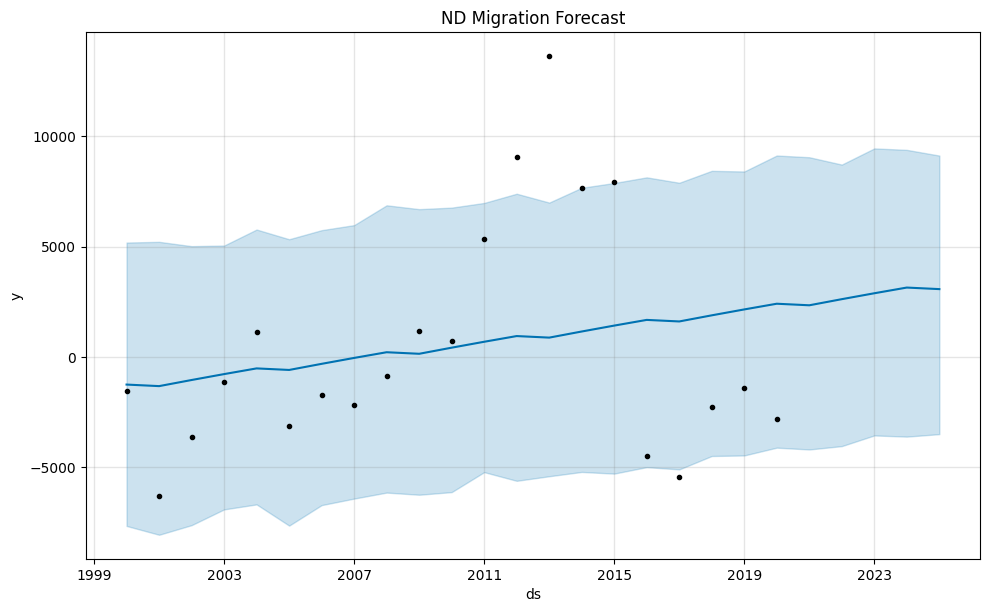

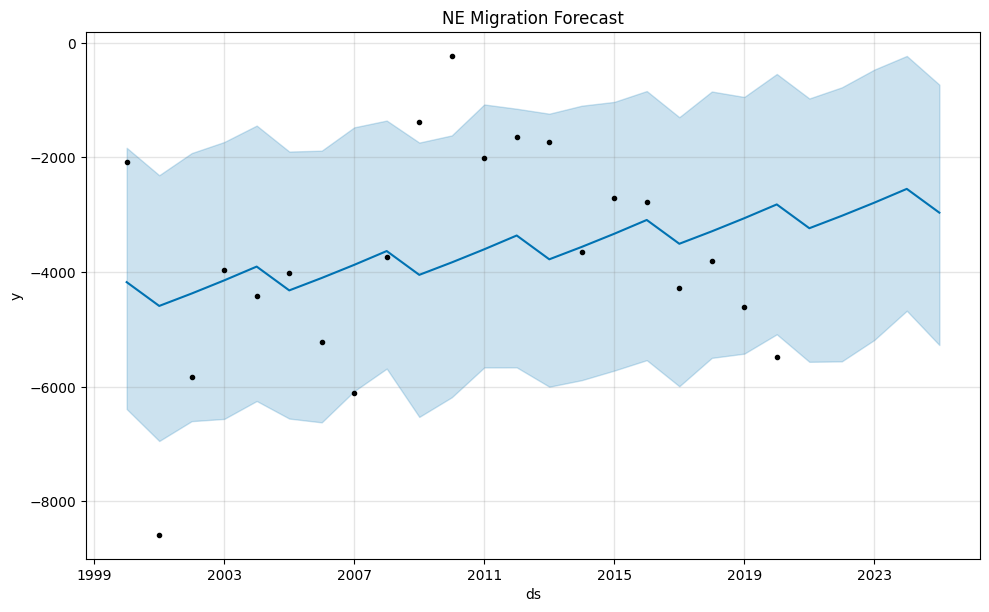

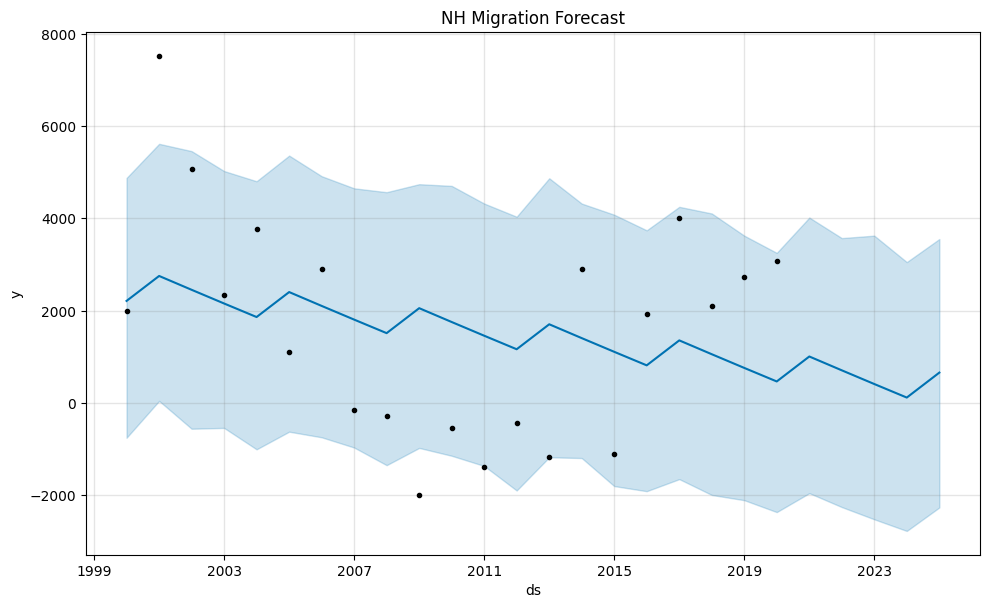

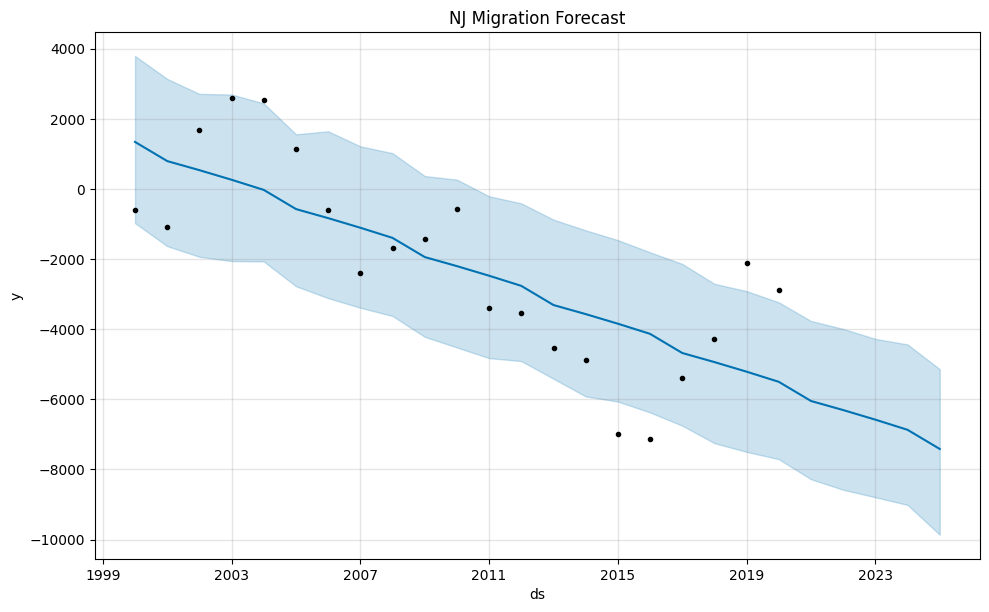

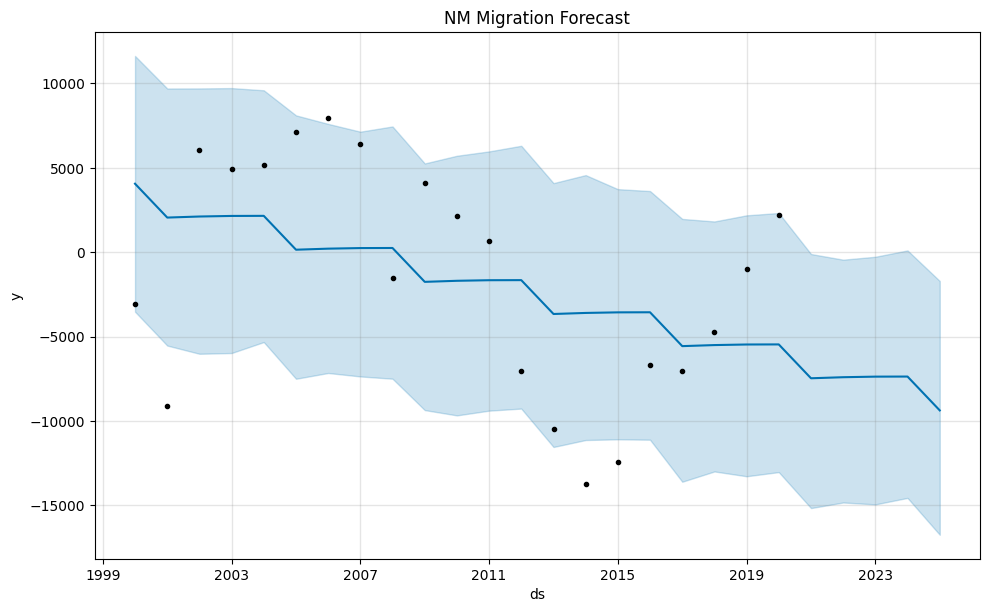

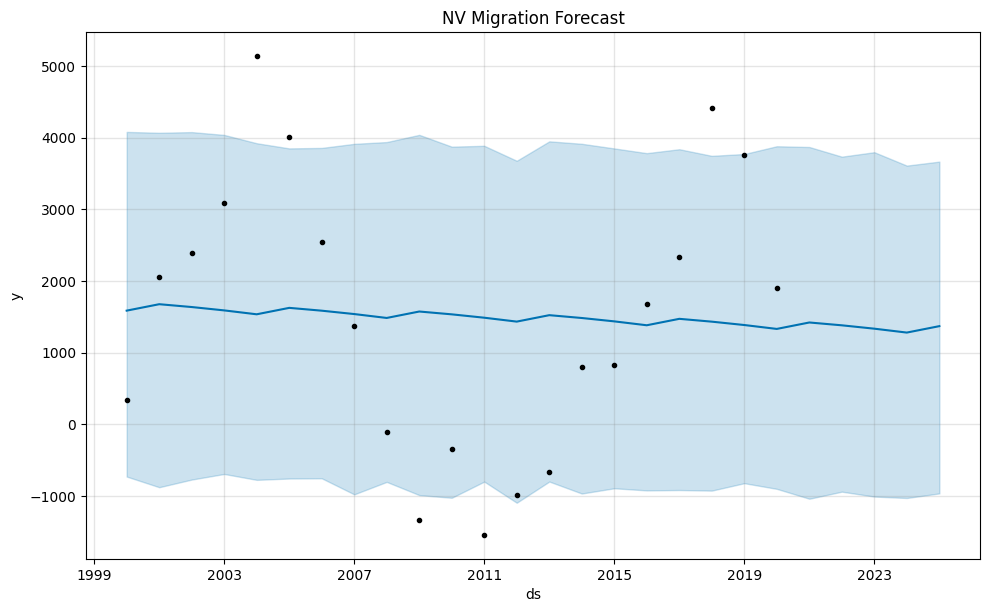

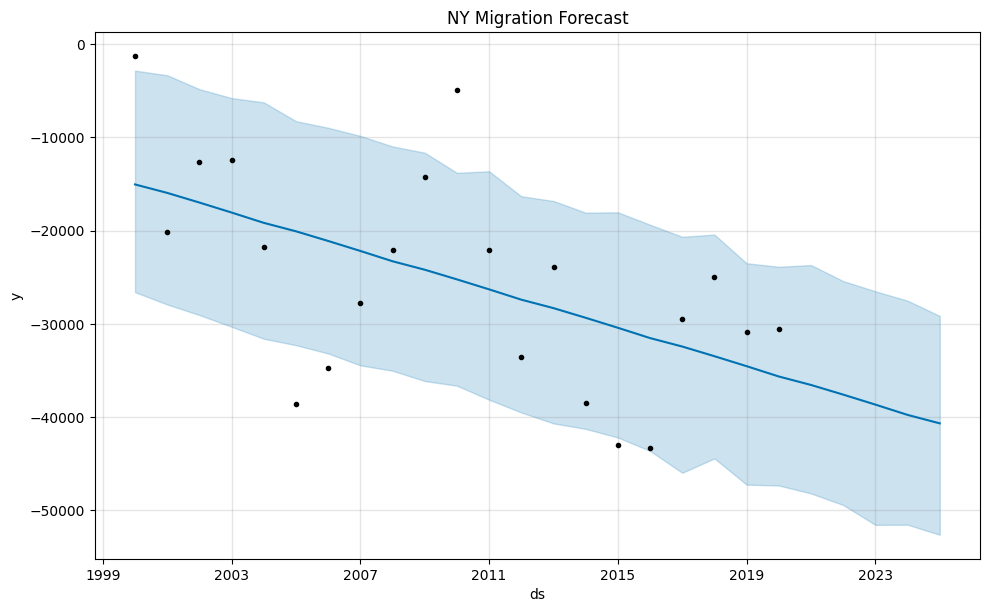

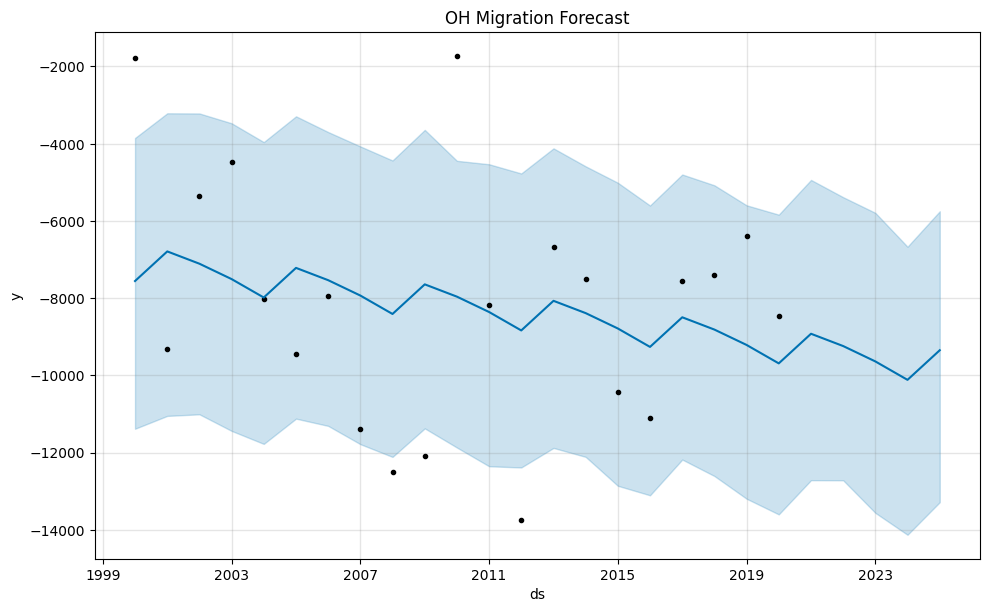

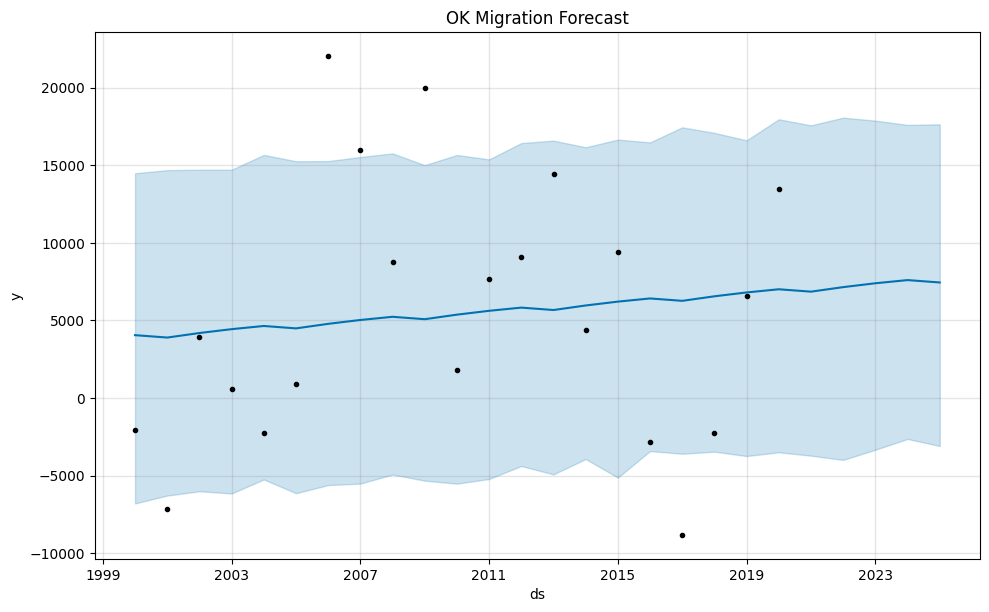

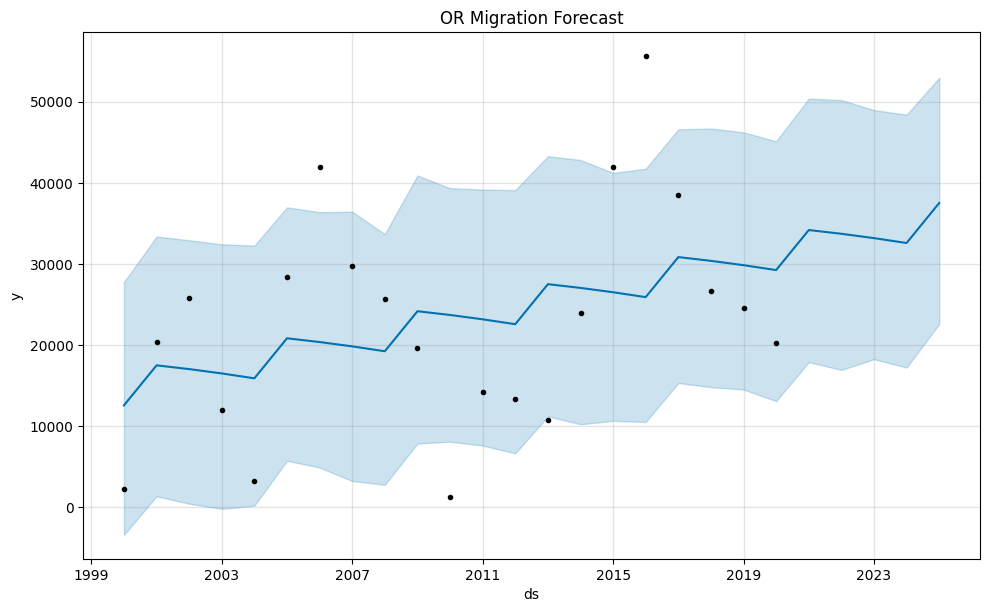

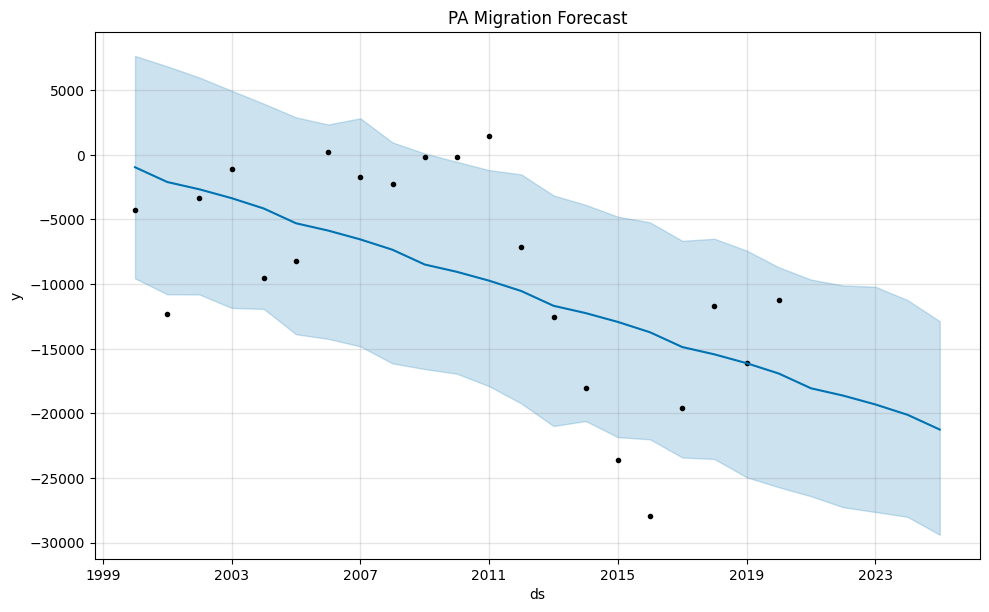

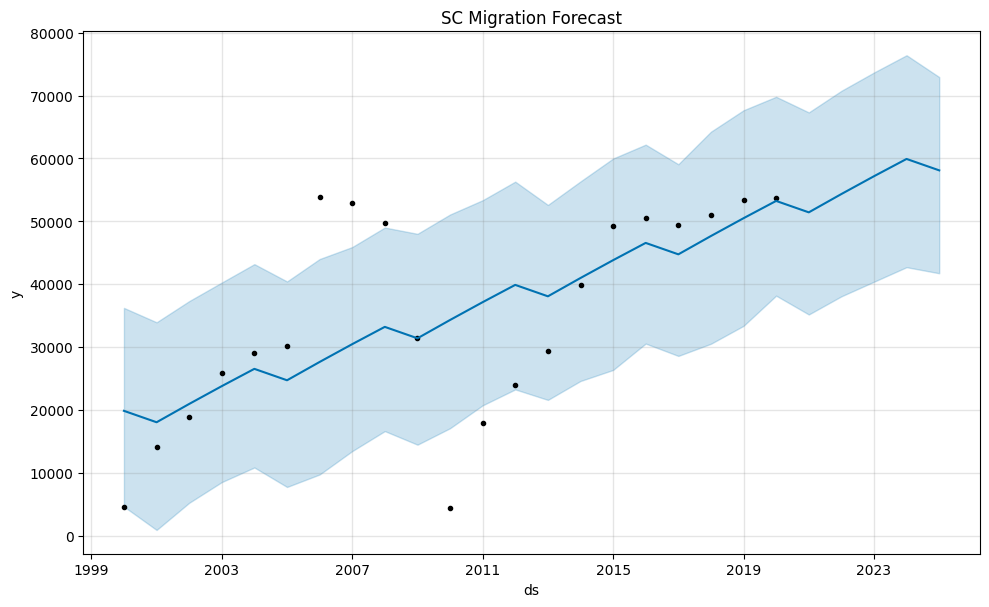

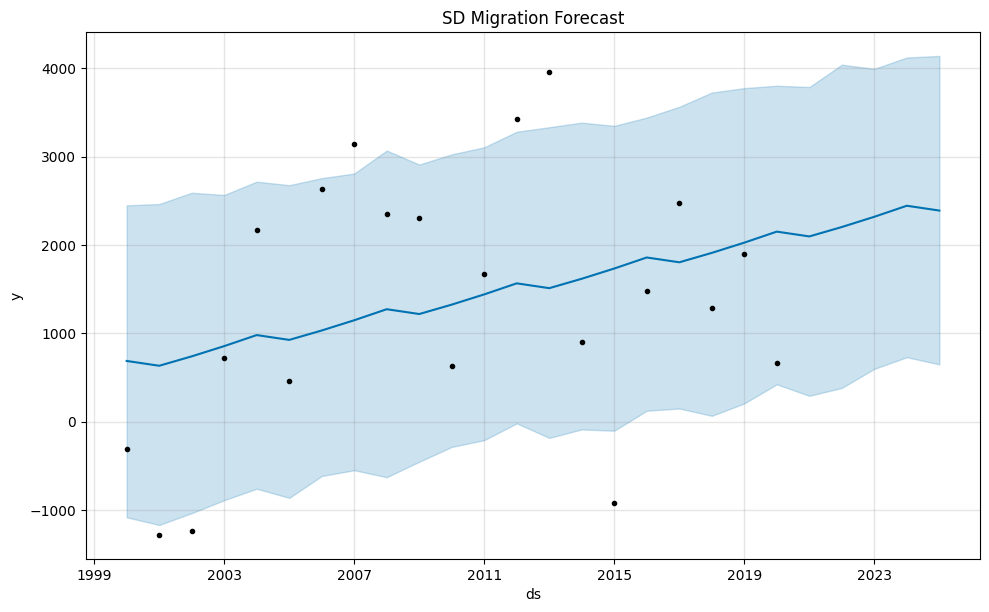

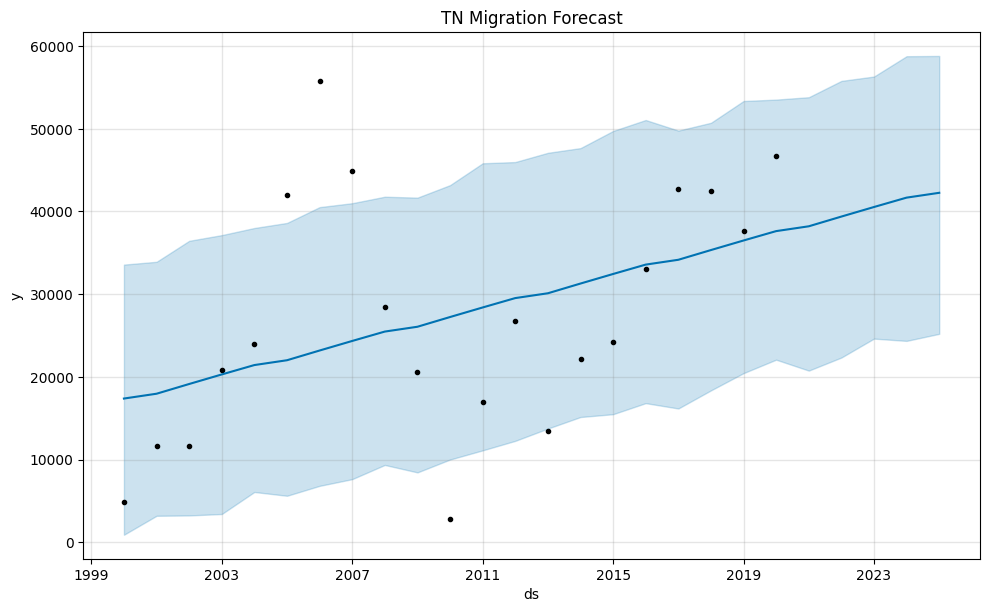

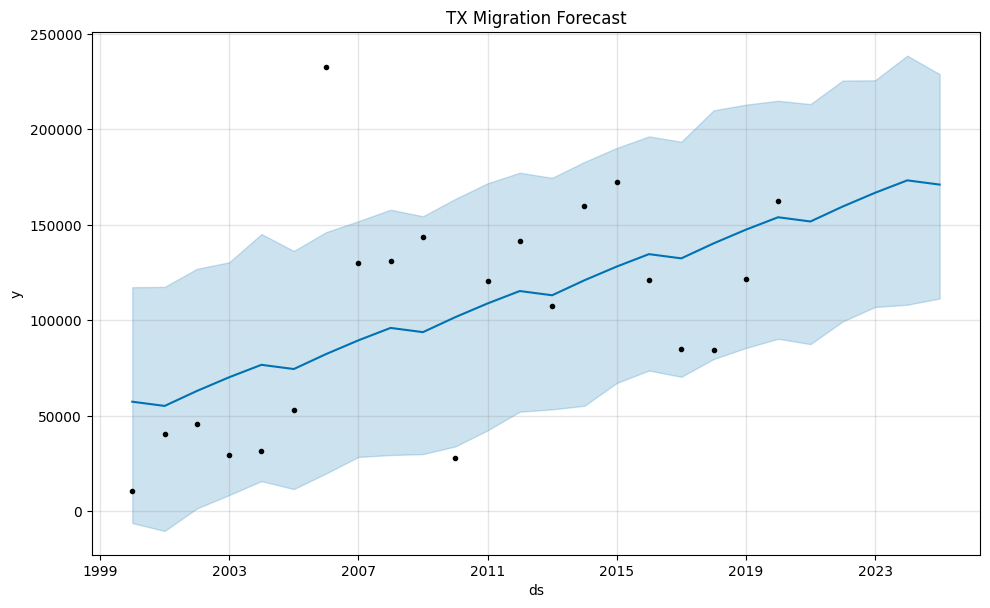

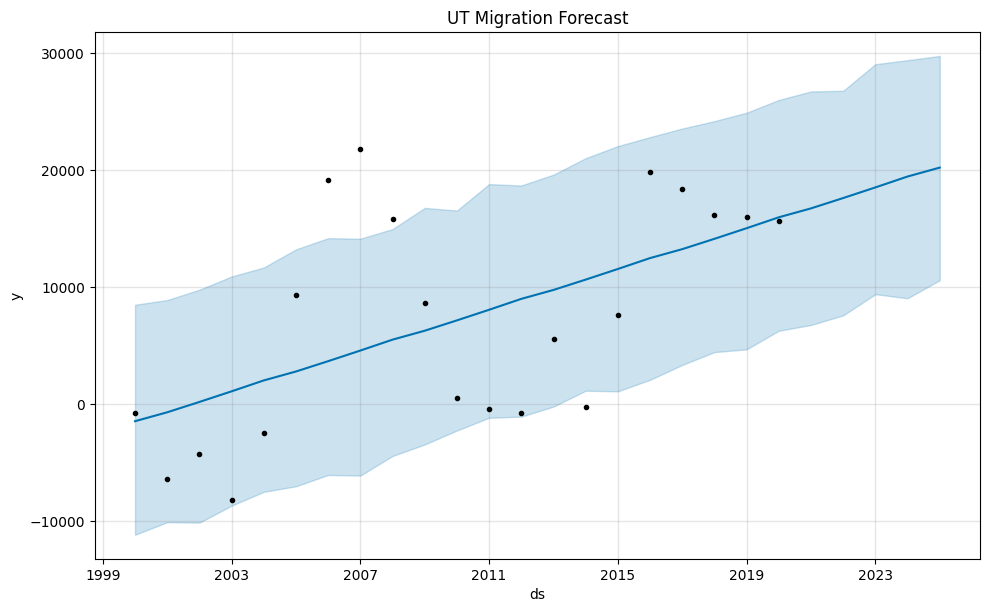

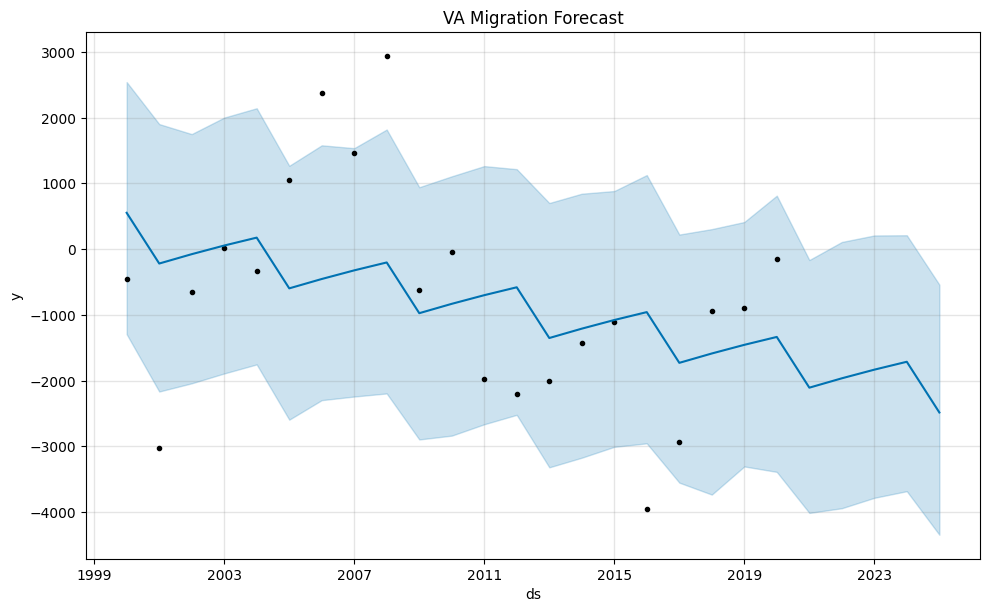

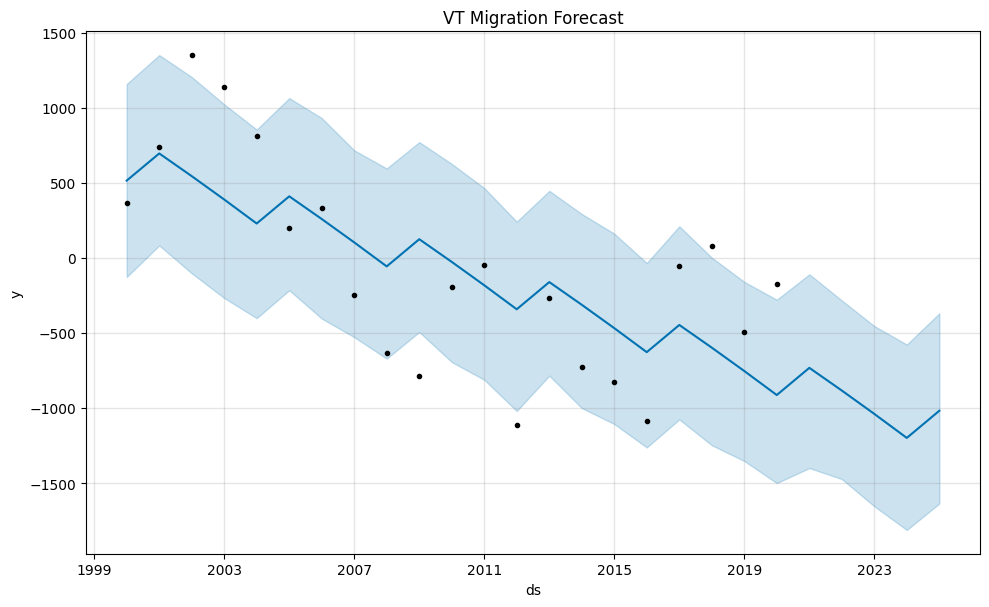

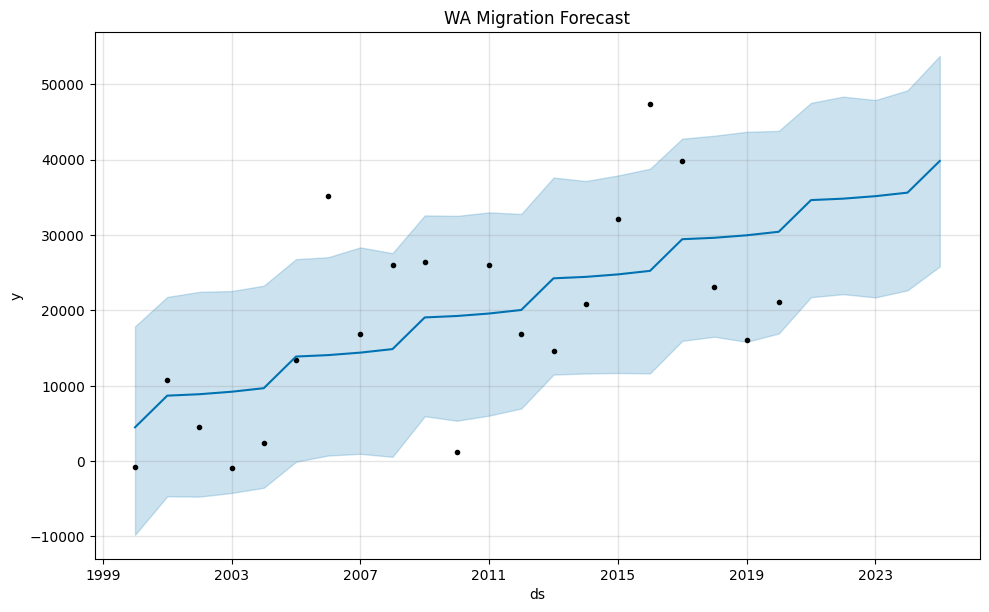

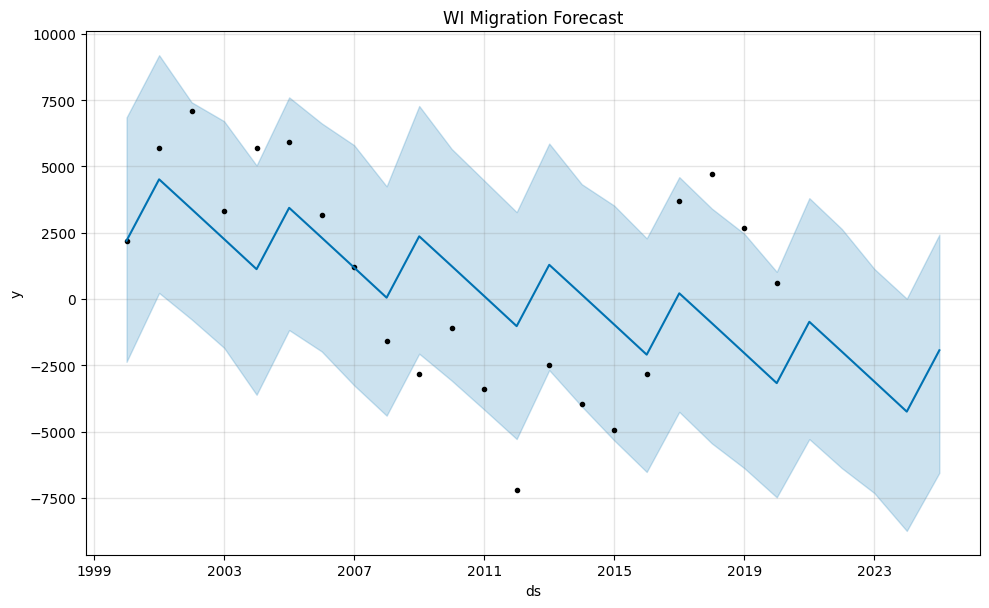

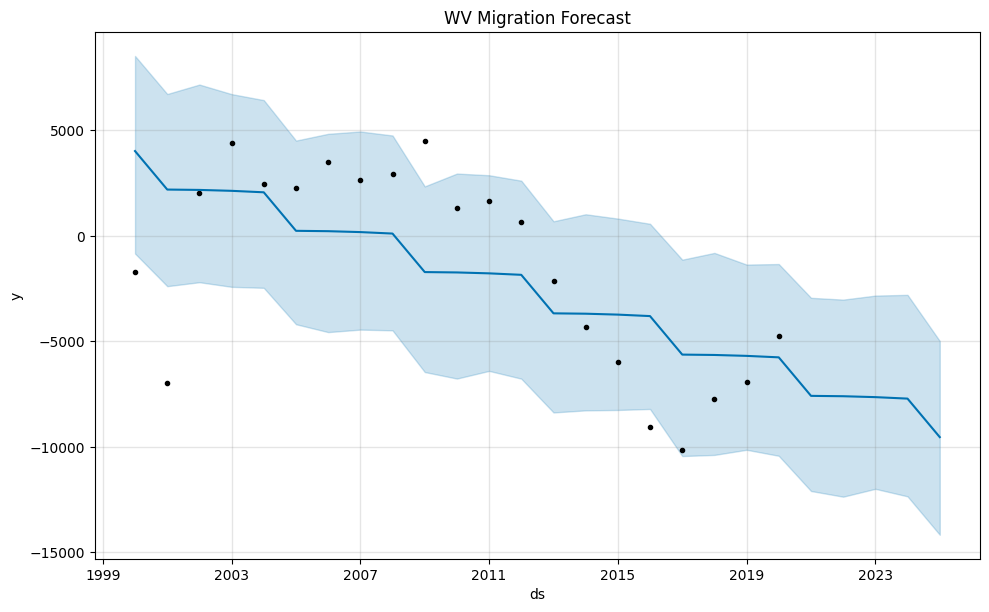

In [ ]:

def run_prophet(df, state):

    df['ds'] = pd.to_datetime(df['Year'], format='%Y')
    df = df[['ds', 'Net Domestic Migration']]

    # Rename the 'Net Domestic Migration' column to 'y'
    df.rename(columns={'Net Domestic Migration': 'y'}, inplace=True)

    # Create the model
    model = Prophet()

    # Fit the model
    model.fit(df)

    # Create a future DataFrame for predictions
    future = model.make_future_dataframe(periods=5, freq='YS')

    # Make predictions
    forecast = model.predict(future)

     # Plot the forecast with a title
    fig = model.plot(forecast)
    plt.title(f'{state} Migration Forecast')

# Run Prophet for each state with for loop
for state, state_df in state_dfs.items():
    run_prophet(state_df, state)

In [ ]:
# Upload the file into Colab, then store in a Pandas DataFrame

from google.colab import files
uploaded = files.upload()

metro_area = pd.read_csv('population_change_metros_micros.csv', encoding='latin1')
metro_area

Saving population_change_metros_micros.csv to population_change_metros_micros.csv


IBRC_Geo_ID  Metrofips/Microfips   Description  Year Geography  Births  \
0           210100                10100  Aberdeen, SD  1990     Micro     151   
1           210100                10100  Aberdeen, SD  1991     Micro     499   
2           210100                10100  Aberdeen, SD  1992     Micro     550   
3           210100                10100  Aberdeen, SD  1993     Micro     522   
4           210100                10100  Aberdeen, SD  1994     Micro     507   
...            ...                  ...           ...   ...       ...     ...   
30273       249820                49820    Zapata, TX  2016     Micro     254   
30274       249820                49820    Zapata, TX  2017     Micro     242   
30275       249820                49820    Zapata, TX  2018     Micro     228   
30276       249820                49820    Zapata, TX  2019     Micro     204   
30277       249820                49820    Zapata, TX  2020     Micro     200   

       Deaths  Net International Migration  Net Domestic Migration  Residual  
0          91                         -1.0                    -156        15  
1         381                          0.0                    -133       -37  
2         407                         10.0                     -16       -19  
3         436                          5.0                      58       -13  
4         422                          3.0                     -29       -17  
...       ...                          ...                     ...       ...  
30273      92                         29.0                    -244        -1  
30274     108                          3.0                    -307         1  
30275      92                         -7.0                    -228        -1  
30276     106                          5.0                     -35         2  
30277     115                         12.0                    -145        -1  

[30278 rows x 10 columns]

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 24.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp18ru6icx/cl9g11tr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp18ru6icx/08nb8pya.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98861', 'data', 'file=/tmp/tmp18ru6icx/cl9g11tr.json', 'init=/tmp/tmp18ru6icx/08nb8pya.json', 'output', 'file=/tmp/tmp18ru6icx/prophet_modelr4wooigw/prophet_model-20240224022139.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:21:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:

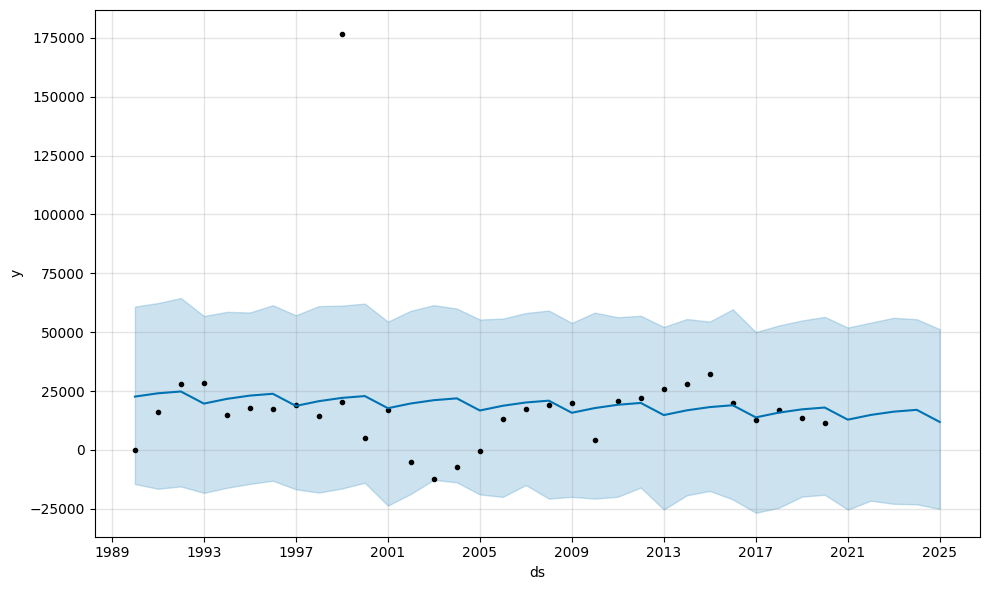

In [ ]:
denver_metro = metro_area[(metro_area['Description'] == 'Denver-Aurora-Lakewood, CO')]
denver_metro = denver_metro[['Year', 'Net Domestic Migration']]
denver_metro['ds'] = pd.to_datetime(denver_metro['Year'], format='%Y')
denver_metro = denver_metro[['ds', 'Net Domestic Migration']]
denver_metro.rename(columns={'Net Domestic Migration': 'y'}, inplace=True)
# Create the model
denver_model = Prophet()

# Fit the model
denver_model.fit(denver_metro)

denver_future = denver_model.make_future_dataframe(periods=5, freq='YS')
# Make predictions
denver_forecast = denver_model.predict(denver_future)

denver_model.plot(denver_forecast);

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 24.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp18ru6icx/3p2p33ur.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp18ru6icx/mm9qcskm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80930', 'data', 'file=/tmp/tmp18ru6icx/3p2p33ur.json', 'init=/tmp/tmp18ru6icx/mm9qcskm.json', 'output', 'file=/tmp/tmp18ru6icx/prophet_modelu3sgxt8y/prophet_model-20240224022158.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:21:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:21:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:

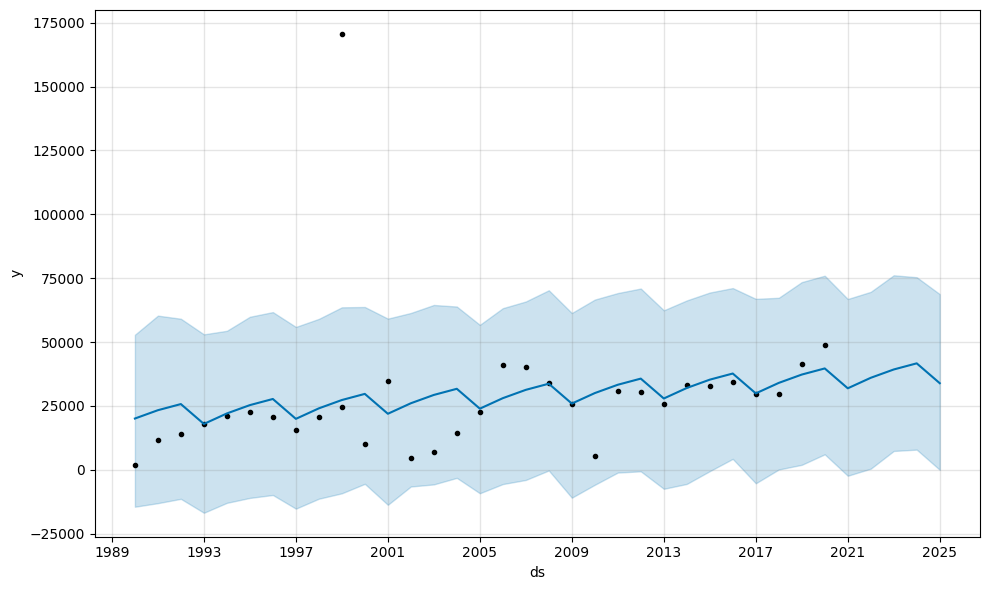

In [ ]:
austin_metro = metro_area[(metro_area['Description'] == 'Austin-Round Rock-Georgetown, TX')]
austin_metro = austin_metro[['Year', 'Net Domestic Migration']]
austin_metro['ds'] = pd.to_datetime(austin_metro['Year'], format='%Y')
austin_metro = austin_metro[['ds', 'Net Domestic Migration']]
austin_metro.rename(columns={'Net Domestic Migration': 'y'}, inplace=True)
# Create the model
austin_model = Prophet()

# Fit the model
austin_model.fit(austin_metro)

austin_future = austin_model.make_future_dataframe(periods=5, freq='YS')
# Make predictions
austin_forecast = austin_model.predict(austin_future)

austin_model.plot(austin_forecast);

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 24.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp18ru6icx/rz72az9f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp18ru6icx/l7a7te9a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64607', 'data', 'file=/tmp/tmp18ru6icx/rz72az9f.json', 'init=/tmp/tmp18ru6icx/l7a7te9a.json', 'output', 'file=/tmp/tmp18ru6icx/prophet_modelr96fra65/prophet_model-20240224022203.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:22:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:22:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:

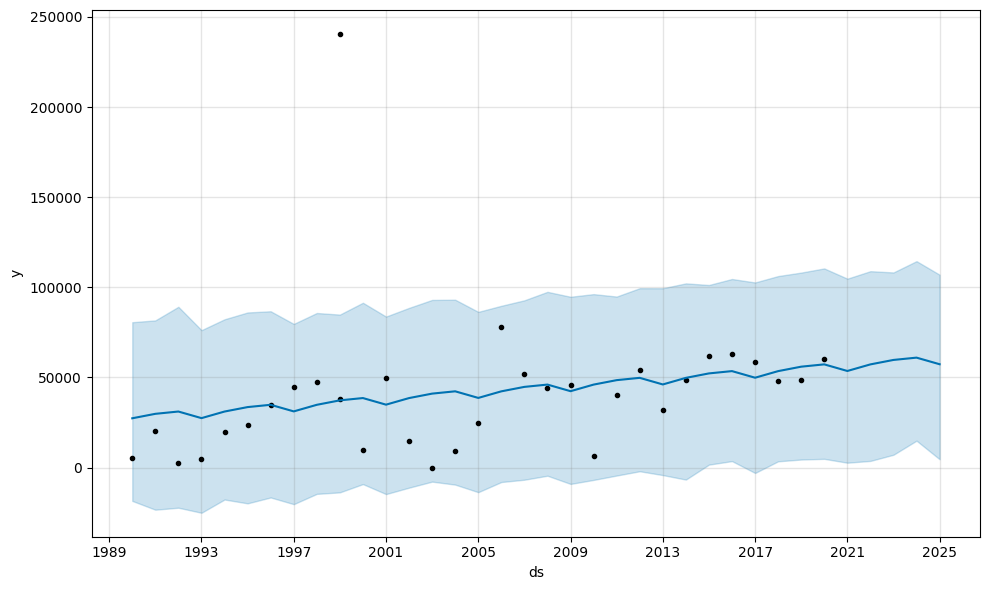

In [ ]:
dallas_metro = metro_area[(metro_area['Description'] == 'Dallas-Fort Worth-Arlington, TX')]
dallas_metro = dallas_metro[['Year', 'Net Domestic Migration']]
dallas_metro['ds'] = pd.to_datetime(dallas_metro['Year'], format='%Y')
dallas_metro = dallas_metro[['ds', 'Net Domestic Migration']]
dallas_metro.rename(columns={'Net Domestic Migration': 'y'}, inplace=True)
# Create the model
dallas_model = Prophet()

# Fit the model
dallas_model.fit(dallas_metro)

dallas_future = dallas_model.make_future_dataframe(periods=5, freq='YS')
# Make predictions
dallas_forecast = dallas_model.predict(dallas_future)

dallas_model.plot(dallas_forecast);

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 24.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp18ru6icx/_4a_kvgj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp18ru6icx/ett8ghg7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36099', 'data', 'file=/tmp/tmp18ru6icx/_4a_kvgj.json', 'init=/tmp/tmp18ru6icx/ett8ghg7.json', 'output', 'file=/tmp/tmp18ru6icx/prophet_modeln98ogoev/prophet_model-20240224022215.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:22:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:22:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:

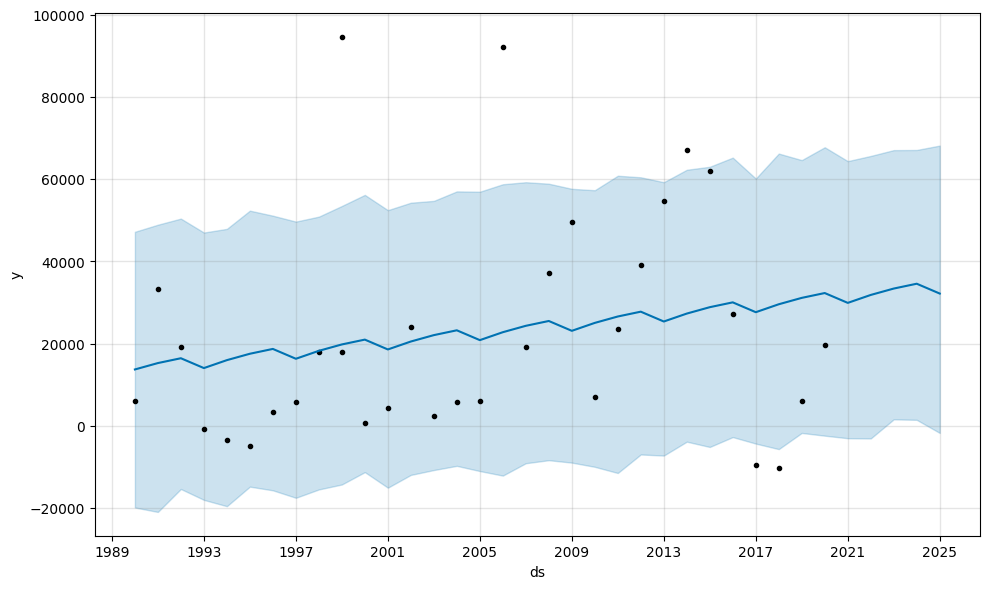

In [ ]:
houston_metro = metro_area[(metro_area['Description'] == 'Houston-The Woodlands-Sugar Land, TX')]
houston_metro = houston_metro[['Year', 'Net Domestic Migration']]
houston_metro['ds'] = pd.to_datetime(houston_metro['Year'], format='%Y')
houston_metro = houston_metro[['ds', 'Net Domestic Migration']]
houston_metro.rename(columns={'Net Domestic Migration': 'y'}, inplace=True)
# Create the model
houston_model = Prophet()

# Fit the model
houston_model.fit(houston_metro)

houston_future = houston_model.make_future_dataframe(periods=5, freq='YS')
# Make predictions
houston_forecast = houston_model.predict(houston_future)

houston_model.plot(houston_forecast);

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 24.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp18ru6icx/qmiaz9gf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp18ru6icx/8vjc9mc5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32861', 'data', 'file=/tmp/tmp18ru6icx/qmiaz9gf.json', 'init=/tmp/tmp18ru6icx/8vjc9mc5.json', 'output', 'file=/tmp/tmp18ru6icx/prophet_model_lpr2prc/prophet_model-20240224022226.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:22:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:22:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:

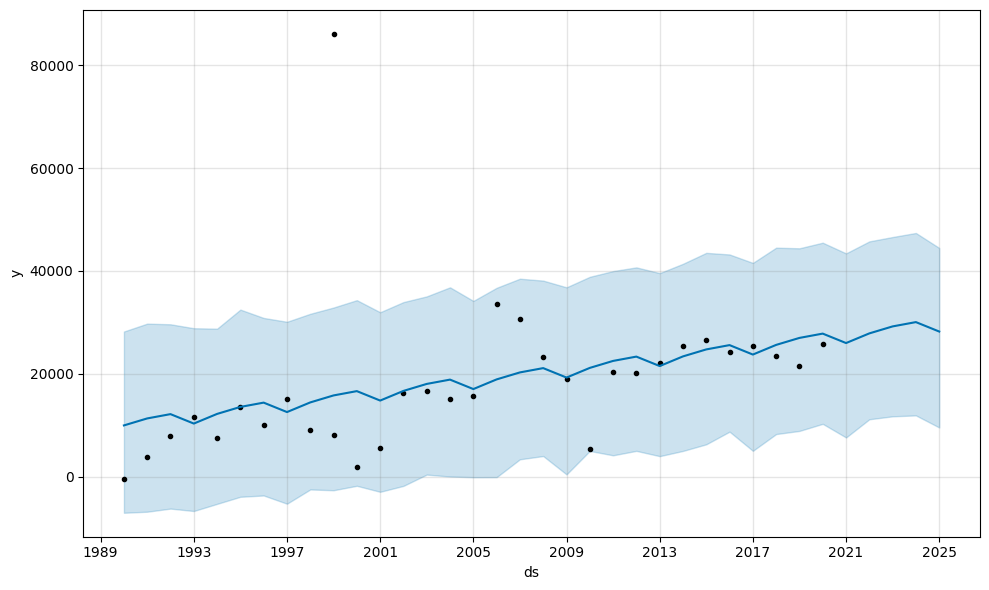

In [ ]:
san_antonio_metro = metro_area[(metro_area['Description'] == 'San Antonio-New Braunfels, TX')]
san_antonio_metro = san_antonio_metro[['Year', 'Net Domestic Migration']]
san_antonio_metro['ds'] = pd.to_datetime(san_antonio_metro['Year'], format='%Y')
san_antonio_metro = san_antonio_metro[['ds', 'Net Domestic Migration']]
san_antonio_metro.rename(columns={'Net Domestic Migration': 'y'}, inplace=True)
# Create the model
san_antonio_model = Prophet()

# Fit the model
san_antonio_model.fit(san_antonio_metro)

san_antonio_future = san_antonio_model.make_future_dataframe(periods=5, freq='YS')
# Make predictions
san_antonio_forecast = san_antonio_model.predict(san_antonio_future)

san_antonio_model.plot(san_antonio_forecast);

In [ ]:
houston = houston_forecast[['ds', 'yhat']]
houston['year'] = houston['ds'].dt.year
houston = houston[['year', 'yhat']]
houston.rename(columns={'yhat': 'houston'}, inplace=True)

dallas = dallas_forecast[['ds', 'yhat']]
dallas['year'] = dallas['ds'].dt.year
dallas = dallas[['year', 'yhat']]
dallas.rename(columns={'yhat': 'dallas'}, inplace=True)

austin = austin_forecast[['ds', 'yhat']]
austin['year'] = austin['ds'].dt.year
austin = austin[['year', 'yhat']]
austin.rename(columns={'yhat': 'austin'}, inplace=True)


san_antonio = san_antonio_forecast[['ds', 'yhat']]
san_antonio['year'] = san_antonio['ds'].dt.year
san_antonio = san_antonio[['year', 'yhat']]
san_antonio.rename(columns={'yhat': 'san_antonio'}, inplace=True)

In [ ]:
tx_state = tx_forecast[['ds', 'yhat']]
tx_state['year'] = tx_state['ds'].dt.year
tx_state = tx_state[['year', 'yhat']]
tx_state.rename(columns={'yhat': 'tx_state'}, inplace=True)

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
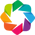

:NdOverlay   [Variable]
   :Curve   [year]   (value)

In [ ]:
hv.extension('bokeh')
texas_metro_areas = pd.concat([df.set_index('year') for df in [dallas, austin, houston, san_antonio]], axis=1, join='inner')
texas_metro_areas.hvplot( title = 'Texas Metro Areas').opts(active_tools=[])

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
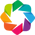

:NdOverlay   [Variable]
   :Curve   [year]   (value)

In [ ]:
TXstate_vs_metro = pd.concat([df.set_index('year') for df in [tx_state,dallas, austin, houston, san_antonio]], axis=1, join='inner')
hv.extension('bokeh')
TXstate_vs_metro.hvplot( title = 'Texas Metro Areas').opts(active_tools=[])

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 24.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp18ru6icx/rm5suuk8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp18ru6icx/mo44odo7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19746', 'data', 'file=/tmp/tmp18ru6icx/rm5suuk8.json', 'init=/tmp/tmp18ru6icx/mo44odo7.json', 'output', 'file=/tmp/tmp18ru6icx/prophet_modelbmzikuo7/prophet_model-20240224025247.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:52:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:52:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:

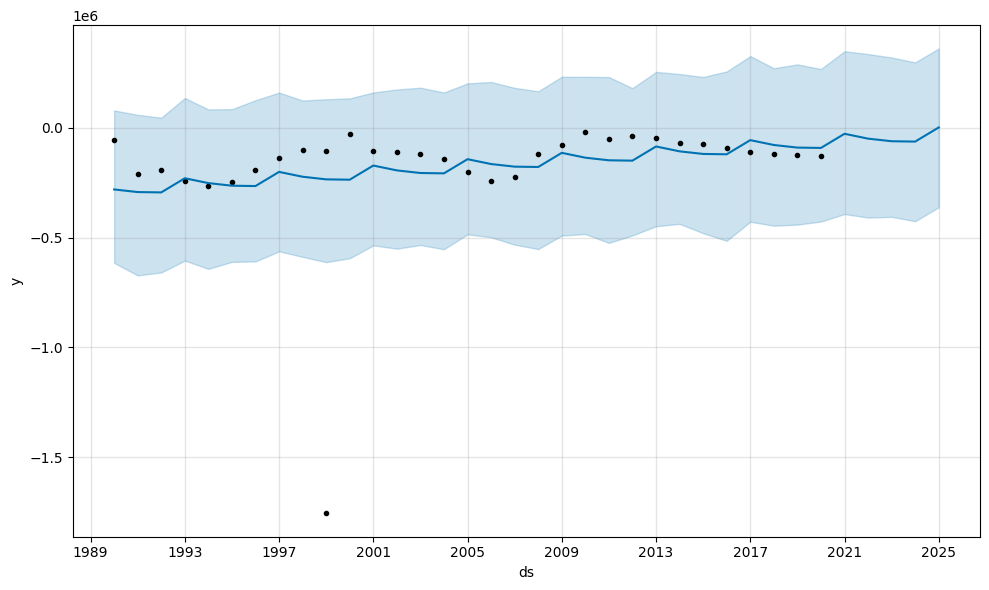

In [ ]:
los_angeles_metro = metro_area[(metro_area['Description'] == 'Los Angeles-Long Beach-Anaheim, CA')]
los_angeles_metro = los_angeles_metro[['Year', 'Net Domestic Migration']]
los_angeles_metro['ds'] = pd.to_datetime(los_angeles_metro['Year'], format='%Y')
los_angeles_metro = los_angeles_metro[['ds', 'Net Domestic Migration']]
los_angeles_metro.rename(columns={'Net Domestic Migration': 'y'}, inplace=True)
# Create the model
los_angeles_model = Prophet()

# Fit the model
los_angeles_model.fit(los_angeles_metro)

los_angeles_future = los_angeles_model.make_future_dataframe(periods=5, freq='YS')
# Make predictions
los_angeles_forecast = los_angeles_model.predict(los_angeles_future)

los_angeles_model.plot(los_angeles_forecast);

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 24.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp18ru6icx/5ikcskxf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp18ru6icx/vqiu3abm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12150', 'data', 'file=/tmp/tmp18ru6icx/5ikcskxf.json', 'init=/tmp/tmp18ru6icx/vqiu3abm.json', 'output', 'file=/tmp/tmp18ru6icx/prophet_modelghovo684/prophet_model-20240224025249.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:52:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:52:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:

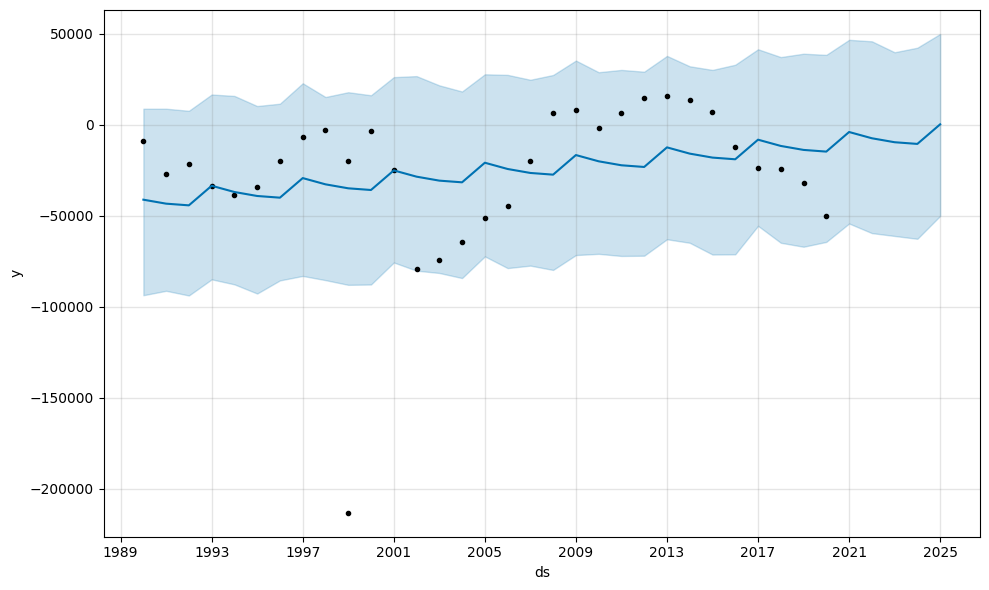

In [ ]:
san_francisco_metro = metro_area[(metro_area['Description'] == 'San Francisco-Oakland-Berkeley, CA')]
san_francisco_metro = san_francisco_metro[['Year', 'Net Domestic Migration']]
san_francisco_metro['ds'] = pd.to_datetime(san_francisco_metro['Year'], format='%Y')
san_francisco_metro = san_francisco_metro[['ds', 'Net Domestic Migration']]
san_francisco_metro.rename(columns={'Net Domestic Migration': 'y'}, inplace=True)
# Create the model
san_francisco_model = Prophet()

# Fit the model
san_francisco_model.fit(san_francisco_metro)

san_francisco_future = san_francisco_model.make_future_dataframe(periods=5, freq='YS')
# Make predictions
san_francisco_forecast = san_francisco_model.predict(san_francisco_future)

san_francisco_model.plot(san_francisco_forecast);

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 24.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp18ru6icx/w7a42as7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp18ru6icx/gn5fqdzp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52897', 'data', 'file=/tmp/tmp18ru6icx/w7a42as7.json', 'init=/tmp/tmp18ru6icx/gn5fqdzp.json', 'output', 'file=/tmp/tmp18ru6icx/prophet_model4b_krh5i/prophet_model-20240224025252.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:52:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:52:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:

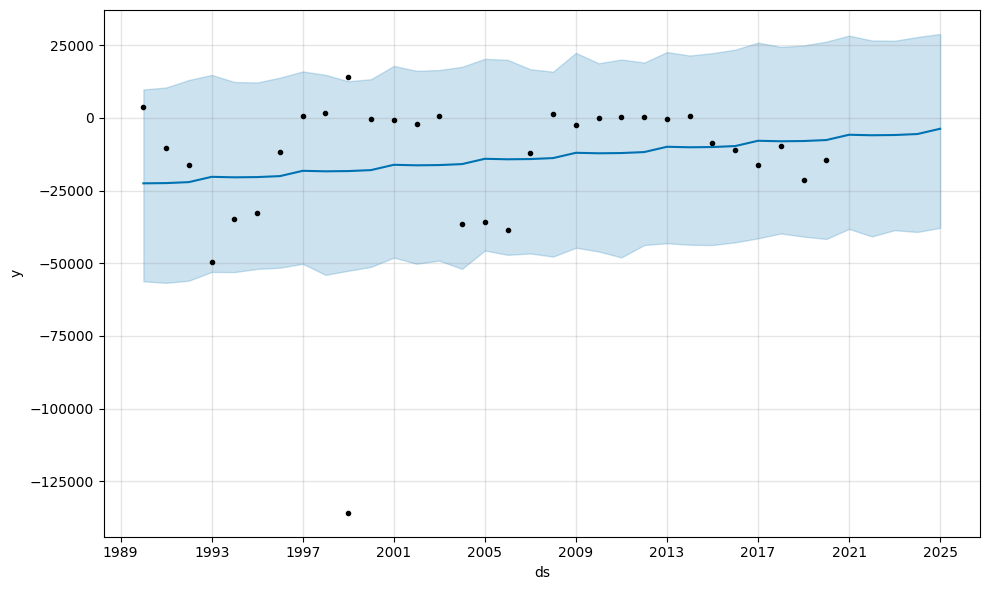

In [ ]:
san_diego_metro = metro_area[(metro_area['Description'] == 'San Diego-Chula Vista-Carlsbad, CA')]
san_diego_metro = san_diego_metro[['Year', 'Net Domestic Migration']]
san_diego_metro['ds'] = pd.to_datetime(san_diego_metro['Year'], format='%Y')
san_diego_metro = san_diego_metro[['ds', 'Net Domestic Migration']]
san_diego_metro.rename(columns={'Net Domestic Migration': 'y'}, inplace=True)
# Create the model
san_diego_model = Prophet()

# Fit the model
san_diego_model.fit(san_diego_metro)

san_diego_future = san_diego_model.make_future_dataframe(periods=5, freq='YS')
# Make predictions
san_diego_forecast = san_diego_model.predict(san_diego_future)

san_diego_model.plot(san_diego_forecast);

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 24.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp18ru6icx/fw6ngewn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp18ru6icx/y8e75ce5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73424', 'data', 'file=/tmp/tmp18ru6icx/fw6ngewn.json', 'init=/tmp/tmp18ru6icx/y8e75ce5.json', 'output', 'file=/tmp/tmp18ru6icx/prophet_model04f9l0dj/prophet_model-20240224025257.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:52:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:52:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:

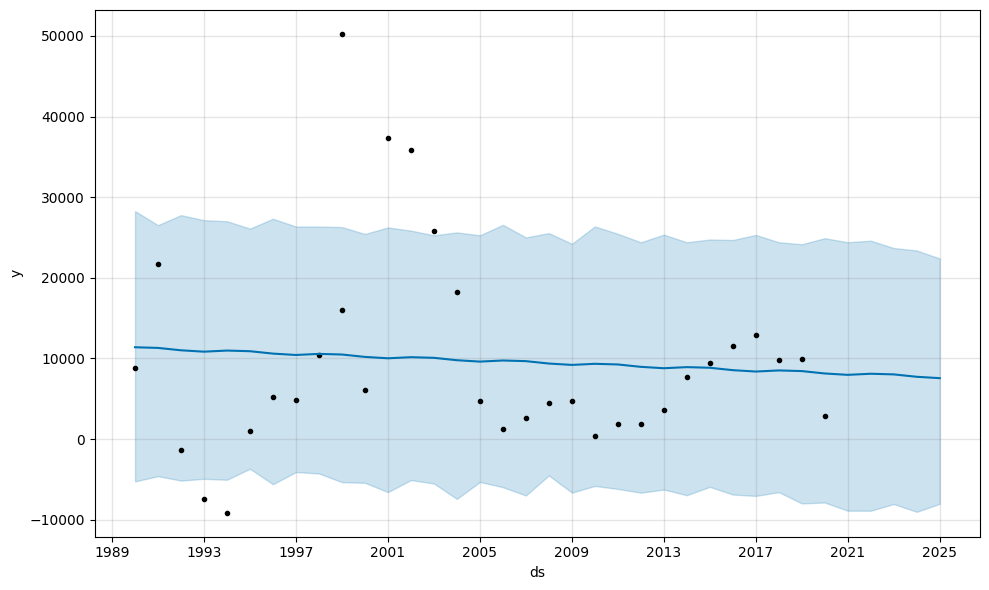

In [ ]:


sacramento_metro = metro_area[(metro_area['Description'] == 'Sacramento-Roseville-Folsom, CA')]
sacramento_metro = sacramento_metro[['Year', 'Net Domestic Migration']]
sacramento_metro['ds'] = pd.to_datetime(sacramento_metro['Year'], format='%Y')
sacramento_metro = sacramento_metro[['ds', 'Net Domestic Migration']]
sacramento_metro.rename(columns={'Net Domestic Migration': 'y'}, inplace=True)
# Create the model
sacramento_model = Prophet()

# Fit the model
sacramento_model.fit(sacramento_metro)

sacramento_future = sacramento_model.make_future_dataframe(periods=5, freq='YS')
# Make predictions
sacramento_forecast = sacramento_model.predict(sacramento_future)

sacramento_model.plot(sacramento_forecast);

In [ ]:
los_angeles = los_angeles_forecast[['ds', 'yhat']]
los_angeles['year'] = los_angeles['ds'].dt.year
los_angeles = los_angeles[['year', 'yhat']]
los_angeles.rename(columns={'yhat': 'los_angeles'}, inplace=True)

san_francisco = san_francisco_forecast[['ds', 'yhat']]
san_francisco['year'] = san_francisco['ds'].dt.year
san_francisco = san_francisco[['year', 'yhat']]
san_francisco.rename(columns={'yhat': 'san_francisco'}, inplace=True)

san_diego = san_diego_forecast[['ds', 'yhat']]
san_diego['year'] = san_diego['ds'].dt.year
san_diego = san_diego[['year', 'yhat']]
san_diego.rename(columns={'yhat': 'san_diego'}, inplace=True)


sacramento = sacramento_forecast[['ds', 'yhat']]
sacramento['year'] = sacramento['ds'].dt.year
sacramento = sacramento[['year', 'yhat']]
sacramento.rename(columns={'yhat': 'sacramento'}, inplace=True)

ca_state = ca_forecast[['ds', 'yhat']]
ca_state['year'] = ca_state['ds'].dt.year
ca_state = ca_state[['year', 'yhat']]
ca_state.rename(columns={'yhat': 'ca_state'}, inplace=True)

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
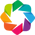

:NdOverlay   [Variable]
   :Curve   [year]   (value)

In [ ]:
hv.extension('bokeh')
california_metro_areas = pd.concat([df.set_index('year') for df in [los_angeles, san_francisco, san_diego, sacramento]], axis=1, join='inner')
california_metro_areas.hvplot( title = 'California Metro Areas').opts(active_tools=[])

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
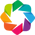

:NdOverlay   [Variable]
   :Curve   [year]   (value)

In [ ]:
CAstate_vs_metro = pd.concat([df.set_index('year') for df in [ca_state, los_angeles, san_francisco, san_diego, sacramento]], axis=1, join='inner')
hv.extension('bokeh')
CAstate_vs_metro.hvplot( title = 'Texas Metro Areas').opts(active_tools=[])